# Capstone Project: Post-Covid Mental Health Status

## Problem Statement
The ongoing Household Pulse Survey conducted in the States aims to measure household experiences during the coronvarius pandemic. This unprecendented spread of COVID-19 is predicted to have a long-tail effect on the mental health of people similar to the aftermath of many past natural diseases/pandemics. Moreover, the lack of mental heath literacy/awareness has discouraged people from seeking the help they need. In order to identify this susceptible group of people as well as to understand and quantify importance of factors that drive such a vulnerability/resistance to seeking mental aid, I aim to build two models to meet two different objectives. One is a binary classification **ExtraTrees Classifier model** to predict the development of avoidance behaviours with regards to seeking mental health therapy and a second **Logistic Regression** inference model to identify the top predictor features given the wide range of variables present which provides a holistic overview of a person's livelihood. Understanding these features would aid in making well-informed recommendations to better tackle the root causes of such a tendency. The performances of these models would be evaluated by **ROC-AUC** and **recall** scores. 

## Executive Summary
Prior to COVID-19, Mental Health America(MHA) has reported an increase in the number of mental health disorders from 2017-2018 where an additional 1.5million people suffered from mental health distress. Moreover, reports have shown that these health needs are often unmet, with 60% of youths and 23.6% of adults with major depression not receiving adequate treatments even in states with highly accessible healthcare. The declaration of a national state of emergency for COVID-19 on March 13 has only exacerbated this phenomenon. Mental Health America(MHA) has reported that there is a 634% and 873% increase in the number of people who underwent online anxiety and depression screening tests respectively on the MHA portal from Janaury to September 2020. Among these respondents, 8/10 of them were scored with moderate to severe symptoms since the declaration of the covid pandemic. Therefore there is an alarming trend in the number of people developing mental health disorders.There is now an increasing need to destigmatize mental health and to provide early interventions before associated problems manifest. <br> 

**Direction of the project** <br>
The goal is to build two models, one to identify respondents with the tendency to avoid seeking mental healthaid and the other to identify important predictor features that strongly correlates with such an inclination.The metrics used to evaluate the models' performances are ROC-AUC and recall scores. With these two models, I aim to provide well-informed suggestions to stateboards and mental health institutes on where to focus and channel resources to curb underlying root causes of such mental distress. Data used is collected from the Household Pulse Survey conducted by United States Census Bureau which is a holisitic questionnaire that measures social,economical and physical impact of COVID on a person's livelihood.

**Findings - Data Analysis** <br>
A logistic regression model used identified the frequency of feeling down/sad/hopeless(`DOWN` variable), frequency of feeling anxious(`ANXIOUS`), age(`TBIRTH_YEAR`) and gender(`EGENDER`) as the top few predictor variables that correlates with a resistance to seeking mental health aid(`MH_NOTGET`). <br>

- #### `DOWN` and `ANXIOUS`
There is a positive correlation with `DOWN` and `ANXIOUS` and `MH_NOTGET` where respondents who experience persistent feelings of sadness and anxieties are more likely to be passive in seeking mental therapy.
- #### `TBIRTH_YEAR`
There is a positive correlation between `TBIRTH_YEAR` and `MH_NOTGET` as the younger population are more susceptible to developing such an inclination as compared to the older generation.


**Findings - Data Modeling** <br>
An optimized ExtraTrees Classifier was selected as the final model due to its reduced bias and variance errors as compared to the other models. Based on this model, we could also re-evaluate the false positives generated where respondents exhibited signs of refusing mental help but they have indicated otherwise.<br>

| Model | ROC-AUC | Recall |
| --- | --- | --- |
|Logistic Regression|0.790|0.802|
|ExtraTrees Classifier|0.770|0.856|

## Risk and assumptions

The dataset consists of a set of questionaries which are heavily subjected to response bias given that these survey questions are answered voluntarily. Therefore, the responses are highly influenced by experimental conditions such as phrasing of questions in surveys, length of survey and intentions of a respondent. Moreover, since this is an online survey, this would disregard respondents such as those who lack access to internet services and thus would not be reflective of these groups of people. However, collection of data from such an online avenue would allow for a quicker collation of results especially given that there is an existing increase in people seeking mental help online and thus appropriate interventions can be implemented as soon as possible. Lastly, models built would not allow help to predict future occurrences but also to re-assess the sentiments of the current respondents' which could potentially identify those who are unaware of an existing mental condition.

### Contents

- [Data Visualization](#Data-Visualization)
- [Data Cleaning](#Data-Cleaning)
- [Dropping unnecessary columns](#Dropping-unnecessary-columns)
- [Impute missing values](#Impute-missing-values)
- [Target variable](#Target-variable)
- [References](#References)

In [139]:
# import libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

### Data Visualization

In [140]:
# Reading the csv file
df = pd.read_csv('../datasets/pulse2020_puf_13.csv')

In [141]:
# Number of columns and rows in data
print(f'Rows: {df.shape[0]}')
print(f'Columns: {df.shape[1]}')

Rows: 109051
Columns: 188


In [142]:
# Looking at the first 5 rows of data
df.head()

SCRAM  WEEK  EST_ST  EST_MSA  REGION      HWEIGHT  \
0  V130000001S12010403200123    13      48  19100.0       2  1276.886650   
1  V130000001S34010154300113    13       1      NaN       2  1195.578846   
2  V130000001S37010241600123    13       1      NaN       2  1124.648326   
3  V130000001S37010645600123    13       1      NaN       2   517.598058   
4  V130000001S70011963510113    13       1      NaN       2   432.646602   

       PWEIGHT  TBIRTH_YEAR  ABIRTH_YEAR  EGENDER  ...  PSWHYCHG1  PSWHYCHG2  \
0  1278.107099         1989            2        1  ...        -88        -88   
1  2323.078960         1988            2        2  ...        -99        -99   
2  1092.628425         1969            2        1  ...        -88        -88   
3  1005.723011         1947            2        1  ...        -88        -88   
4   840.657411         1968            2        2  ...        -88        -88   

   PSWHYCHG3  PSWHYCHG4  PSWHYCHG5  PSWHYCHG6  PSWHYCHG7  PSWHYCHG8  \
0        -88        -88        -88        -88        -88        -88   
1        -99          1          1        -99          1        -99   
2        -88        -88        -88        -88        -88        -88   
3        -88        -88        -88        -88        -88        -88   
4        -88        -88        -88        -88        -88        -88   

   PSWHYCHG9  INCOME  
0        -88       2  
1          1       6  
2        -88       7  
3        -88       6  
4        -88     -88  

[5 rows x 188 columns]

In [143]:
# Statistical summary of features
df.describe()

WEEK         EST_ST       EST_MSA         REGION        HWEIGHT  \
count  109051.0  109051.000000  35244.000000  109051.000000  109051.000000   
mean       13.0      27.699242  31792.698899       2.685239    1114.342647   
std         0.0      16.409699  11514.840187       1.079868    1755.280822   
min        13.0       1.000000  12060.000000       1.000000      19.994057   
25%        13.0      12.000000  19100.000000       2.000000     332.761427   
50%        13.0      27.000000  35620.000000       3.000000     604.820254   
75%        13.0      42.000000  41860.000000       4.000000    1179.949186   
max        13.0      56.000000  47900.000000       4.000000  110618.302480   

             PWEIGHT    TBIRTH_YEAR    ABIRTH_YEAR        EGENDER  \
count  109051.000000  109051.000000  109051.000000  109051.000000   
mean     2284.902624    1969.251974       1.991793       1.587753   
std      4156.272497      15.953085       0.090221       0.492242   
min        19.635651    1932.000000       1.000000       1.000000   
25%       555.814095    1956.000000       2.000000       1.000000   
50%      1125.616392    1969.000000       2.000000       2.000000   
75%      2348.620985    1982.000000       2.000000       2.000000   
max    228944.991150    2002.000000       2.000000       2.000000   

             AGENDER  ...      PSWHYCHG1      PSWHYCHG2      PSWHYCHG3  \
count  109051.000000  ...  109051.000000  109051.000000  109051.000000   
mean        1.993095  ...     -84.786559     -89.458684     -88.606789   
std         0.082809  ...      19.677547       5.565538       9.959077   
min         1.000000  ...     -99.000000     -99.000000     -99.000000   
25%         2.000000  ...     -88.000000     -88.000000     -88.000000   
50%         2.000000  ...     -88.000000     -88.000000     -88.000000   
75%         2.000000  ...     -88.000000     -88.000000     -88.000000   
max         2.000000  ...       1.000000       1.000000       1.000000   

           PSWHYCHG4      PSWHYCHG5      PSWHYCHG6     PSWHYCHG7  \
count  109051.000000  109051.000000  109051.000000  109051.00000   
mean      -81.777875     -88.182217     -87.666862     -86.22075   
std        24.361783      11.516732      13.143646      16.80769   
min       -99.000000     -99.000000     -99.000000     -99.00000   
25%       -88.000000     -88.000000     -88.000000     -88.00000   
50%       -88.000000     -88.000000     -88.000000     -88.00000   
75%       -88.000000     -88.000000     -88.000000     -88.00000   
max         1.000000       1.000000       1.000000       1.00000   

           PSWHYCHG8      PSWHYCHG9         INCOME  
count  109051.000000  109051.000000  109051.000000  
mean      -86.225335     -88.262914     -16.580215  
std        16.797533      11.238543      39.391120  
min       -99.000000     -99.000000     -99.000000  
25%       -88.000000     -88.000000       1.000000  
50%       -88.000000     -88.000000       4.000000  
75%       -88.000000     -88.000000       6.000000  
max         1.000000       1.000000       8.000000  

[8 rows x 187 columns]

### Data Cleaning

In [144]:
# Check for duplicates
df[df.duplicated()]

Empty DataFrame
Columns: [SCRAM, WEEK, EST_ST, EST_MSA, REGION, HWEIGHT, PWEIGHT, TBIRTH_YEAR, ABIRTH_YEAR, EGENDER, AGENDER, RHISPANIC, AHISPANIC, RRACE, ARACE, EEDUC, AEDUC, MS, THHLD_NUMPER, AHHLD_NUMPER, THHLD_NUMKID, AHHLD_NUMKID, THHLD_NUMADLT, WRKLOSS, EXPCTLOSS, ANYWORK, KINDWORK, RSNNOWRK, TW_START, UNEMPPAY, UI_APPLY, UI_RECV, TUI_NUMPER, SSA_RECV, SSA_APPLY, SSAPGM1, SSAPGM2, SSAPGM3, SSAPGM4, SSAPGM5, SSALIKELY, SSAEXPCT1, SSAEXPCT2, SSAEXPCT3, SSAEXPCT4, SSAEXPCT5, SSADECISN, EXPNS_DIF, CHNGHOW1, CHNGHOW2, CHNGHOW3, CHNGHOW4, CHNGHOW5, CHNGHOW6, CHNGHOW7, CHNGHOW8, CHNGHOW9, CHNGHOW10, CHNGHOW11, CHNGHOW12, WHYCHNGD1, WHYCHNGD2, WHYCHNGD3, WHYCHNGD4, WHYCHNGD5, WHYCHNGD6, WHYCHNGD7, WHYCHNGD8, WHYCHNGD9, WHYCHNGD10, WHYCHNGD11, WHYCHNGD12, WHYCHNGD13, SPNDSRC1, SPNDSRC2, SPNDSRC3, SPNDSRC4, SPNDSRC5, SPNDSRC6, SPNDSRC7, SPNDSRC8, FEWRTRIPS, FEWRTRANS, PLNDTRIPS, CNCLDTRPS, PRIFOODSUF, CURFOODSUF, CHILDFOOD, FOODSUFRSN1, FOODSUFRSN2, FOODSUFRSN3, FOODSUFRSN4, FOODSUFRSN5, FREEFOOD, WHEREFREE1, WHEREFREE2, WHEREFREE3, WHEREFREE4, WHEREFREE5, WHEREFREE6, ...]
Index: []

[0 rows x 188 columns]

In [145]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['EST_MSA'], dtype='object')

In [146]:
# Displaying percentage of null values in EST_MSA columns
df[null_columns].isnull().sum()/len(df) * 100

EST_MSA    67.681177
dtype: float64

Since responses -88 and -99 represent missing values, they would be grouped together and replaced with null instead.

In [147]:
# Converting all missing values to np.nan
for col in df.columns:
    try:
        df[col] = df[col].map(lambda x: np.nan if (x == -88) | (x == -99) else x)
    except ValueError:
        print(f'{col} cannot be converted to null values')

In [148]:
# Checking for columns with null values
null_columns = df.columns[df.isnull().any()]
null_columns

Index(['EST_MSA', 'MS', 'WRKLOSS', 'EXPCTLOSS', 'ANYWORK', 'KINDWORK',
       'RSNNOWRK', 'TW_START', 'UNEMPPAY', 'UI_APPLY',
       ...
       'PSWHYCHG1', 'PSWHYCHG2', 'PSWHYCHG3', 'PSWHYCHG4', 'PSWHYCHG5',
       'PSWHYCHG6', 'PSWHYCHG7', 'PSWHYCHG8', 'PSWHYCHG9', 'INCOME'],
      dtype='object', length=165)

In [149]:
# Displaying percentage of null values in all columns with null values
percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = dict(sorted(percent_null.items(),key = lambda x: x[1],reverse = True))
sorted_percent_null

{'SNAPMNTH9': 100.0,
 'SNAPMNTH10': 100.0,
 'SNAPMNTH11': 100.0,
 'SNAPMNTH12': 100.0,
 'WHEREFREE5': 99.9138017991582,
 'SSAPGM3': 99.8771217136936,
 'PSWHYCHG2': 99.80834655344746,
 'SSAEXPCT3': 99.79367451926163,
 'WHEREFREE3': 99.77808548293918,
 'PSCHNG5': 99.77258347011949,
 'INTRNT3': 99.74415640388442,
 'SSAPGM4': 99.71939734619582,
 'COMP3': 99.68913627568752,
 'PSCHNG6': 99.55800497015159,
 'INTRNT1': 99.51949088041376,
 'PSCHNG7': 99.51123786118423,
 'WHYCHNGD6': 99.37735554923843,
 'SSAPGM2': 99.36360051718921,
 'SSAPGM1': 99.22696719883358,
 'SSAPGM5': 99.22421619242373,
 'SSAEXPCT4': 99.08024685697518,
 'PSWHYCHG3': 98.95645156853216,
 'WHEREFREE4': 98.86841936341712,
 'SSAEXPCT2': 98.83449028436236,
 'WHEREFREE6': 98.81615024163007,
 'PSWHYCHG9': 98.61257576730154,
 'PSWHYCHG5': 98.53187957927942,
 'WHYCHNGD12': 98.48236146390221,
 'WHEREFREE7': 98.31179906649183,
 'FOODSUFRSN4': 98.2980440344426,
 'WHEREFREE2': 98.2742019788906,
 'WHEREFREE1': 98.2622809511146,
 'PSPLAN

#### Dropping unnecessary columns 
Redundant features such as those regarding the availability of internet services, aggregated features such as family size, disruption of travel plans, state of imputation, weights of respondents/households would be dropped as they are  secondary to the social and economical concerns of the respondents.  This would help to speed up the modeling process as redundant features are removed.

In [150]:
df.drop(columns = ['THHLD_NUMPER','THHLD_NUMKID','THHLD_NUMADLT','COMPAVAIL','COMP1','COMP2','COMP3','INTRNTAVAIL',
                  'INTRNT1','INTRNT2','INTRNT3',"SCRAM",'WEEK','HWEIGHT','PWEIGHT','ABIRTH_YEAR','AGENDER','AHISPANIC','ARACE','AEDUC','AHHLD_NUMPER','AHHLD_NUMKID','REGION','PLNDTRIPS','CNCLDTRPS','TCH_HRS',
                  'FEWRTRIPS','FEWRTRANS','TW_START'],inplace = True)

#### Impute missing values
Analyzing missing columns and understanding reasons behind them to better understand how to deal with them.

#### `EST_MSA`
This feature identifies the Metropolitan statistical area but since the `EST_ST` is sufficient to denote the states that respondents are in, this feature can be dropped.

In [151]:
df.drop(columns = ['EST_MSA'],inplace = True)

**`WHEREFREE`**<br>
Questions that ask where people are seeking food aid from

In [152]:
food_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('WHERE')}
food_dict

{'WHEREFREE5': 99.9138017991582,
 'WHEREFREE3': 99.77808548293918,
 'WHEREFREE4': 98.86841936341712,
 'WHEREFREE6': 98.81615024163007,
 'WHEREFREE7': 98.31179906649183,
 'WHEREFREE2': 98.2742019788906,
 'WHEREFREE1': 98.2622809511146}

All `WHEREFREE` columns have > 98% of their data missing and this is because responses to these questions are determined by the responses to `FREEFOOD`. Zooming into the people who are getting food aid, we can look at where they acquire them.

In [153]:
where_free = df[list(food_dict.keys())][df['FREEFOOD'] == 1]
where_free.shape

(5775, 7)

In [154]:
where_free.count()

WHEREFREE5      94
WHEREFREE3     242
WHEREFREE4    1234
WHEREFREE6    1291
WHEREFREE7    1841
WHEREFREE2    1882
WHEREFREE1    1895
dtype: int64

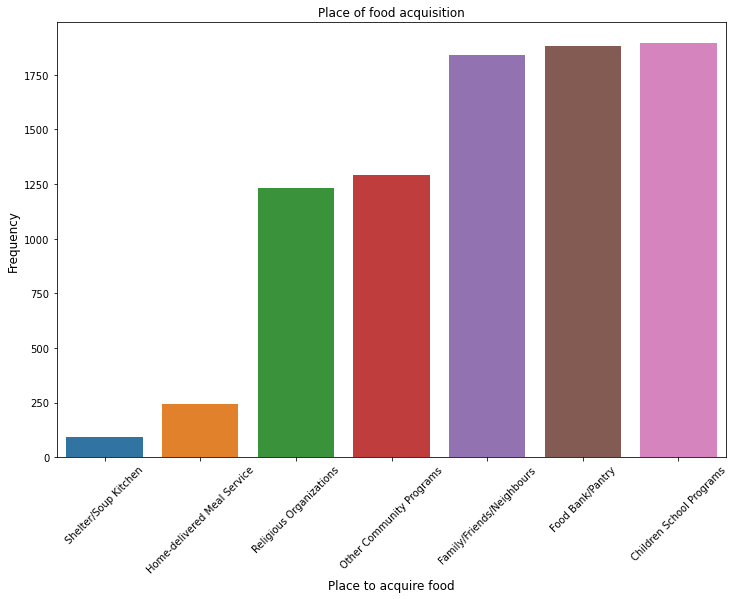

In [155]:
# Graph that shows where people are seeking food aid from
plt.figure(figsize = (12,8))
sns.barplot(x = where_free.count().index,y = where_free.count().values).set_xticklabels(['Shelter/Soup Kitchen','Home-delivered Meal Service',
                                                                         'Religious Organizations','Other Community Programs',
                                                                         'Family/Friends/Neighbours','Food Bank/Pantry','Children School Programs'])
# Set title
plt.title('Place of food acquisition')

# Set y label
plt.ylabel('Frequency',fontsize = 12)

# Set x label
plt.xlabel('Place to acquire food', fontsize = 12)

# Set xticks
plt.xticks(
    rotation=45, 
    fontweight='light'
);

Graph shows that schools are the most popular avenue of food aid which are targetted mainly at children, followed by food banks/pantries.

In [156]:
# There might be overlaps!! Some people receive aid from more than 1 place.
where_free.count().sum()

8479

**`FREEFOOD`**

In [157]:
df.FREEFOOD.value_counts(dropna = False).sort_index()

1.0     5775
2.0    93076
NaN    10200
Name: FREEFOOD, dtype: int64

In [158]:
freefood_df = pd.DataFrame({
    'Response(value)':[i for i in df.FREEFOOD.value_counts(dropna = False).sort_index().index],
    'Response(actual)':['Got Free Food','Didnt Get Free Food','Missing'],
    'Number':[i for i in df.FREEFOOD.value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i,3) for i in df.FREEFOOD.value_counts(dropna = False,normalize = True).sort_index().values*100]
})
freefood_df

Response(value)     Response(actual)  Number  Percentage
0              1.0        Got Free Food    5775       5.296
1              2.0  Didnt Get Free Food   93076      85.351
2              NaN              Missing   10200       9.353

5% of the population across the states are receiving food aids from various avenues as shown above.

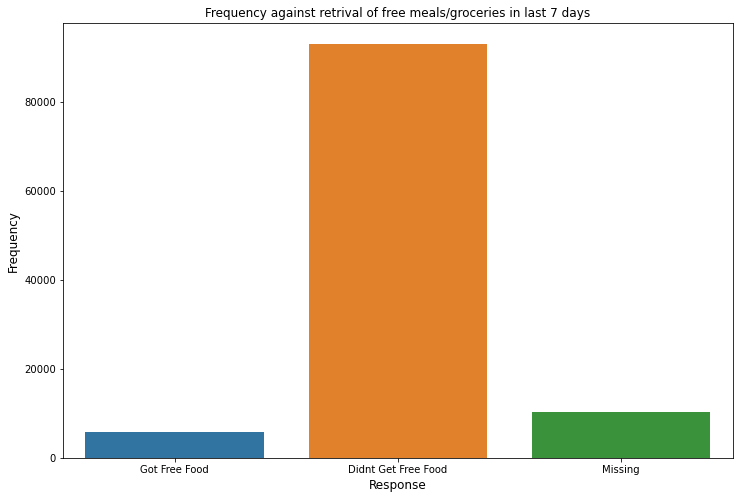

In [159]:
# Bar graph of count against retrival of free food
plt.figure(figsize = (12,8))
sns.barplot(x = freefood_df['Response(actual)'], y = freefood_df['Number'])

# Set title
plt.title('Frequency against retrival of free meals/groceries in last 7 days')

# Set ylabel
plt.ylabel('Frequency',fontsize = 12)

# Set xlabel
plt.xlabel('Response',fontsize = 12);

Majority of the respondents did not receive food aid and therefore it is expected that the `WHEREFREE` columns would have many null values. For ease of reference in `FREE_FOOD`, the no class would be renamed as 0 instead of 2 whereas for nonresponses, they would be grouped in a separate **Missing** class. The null values in `WHEREFREE` column which indicate that they opted for other food aid alternatives, they would be imputed with 0s.

In [160]:
# Renaming the classes where 1 = yes, 2 = no
df['FREEFOOD'] = df['FREEFOOD'].replace(1,'Yes')
df['FREEFOOD'] = df['FREEFOOD'].replace(2,'No')

# Grouping of nonresponses as one class
df['FREEFOOD'].fillna('Missing',inplace = True)

In [161]:
# Imputing all empty WHEREFREE rows with 0s
for col in where_free.columns:
    df[col] = df[col].fillna(0)

**`SSAPGM`** <br>
Asked if replies to `SSA_APPLY` is a yes/1. The SSP programmes that people are currently enrolled in

In [162]:
ssapgm_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('SSAPGM')}
ssapgm_dict

{'SSAPGM3': 99.8771217136936,
 'SSAPGM4': 99.71939734619582,
 'SSAPGM2': 99.36360051718921,
 'SSAPGM1': 99.22696719883358,
 'SSAPGM5': 99.22421619242373}

There are many missing `SSAPGM` values as responses are determined by the answers to `SSA_APPLY`. 

In [163]:
# dataframe of only those who applied for SSP
ssapgm_df = df[[i for i in ssapgm_dict.keys()]]

In [164]:
ssapgm = df[[i for i in ssapgm_dict.keys()]].count()
ssapgm

SSAPGM3    134
SSAPGM4    306
SSAPGM2    694
SSAPGM1    843
SSAPGM5    846
dtype: int64

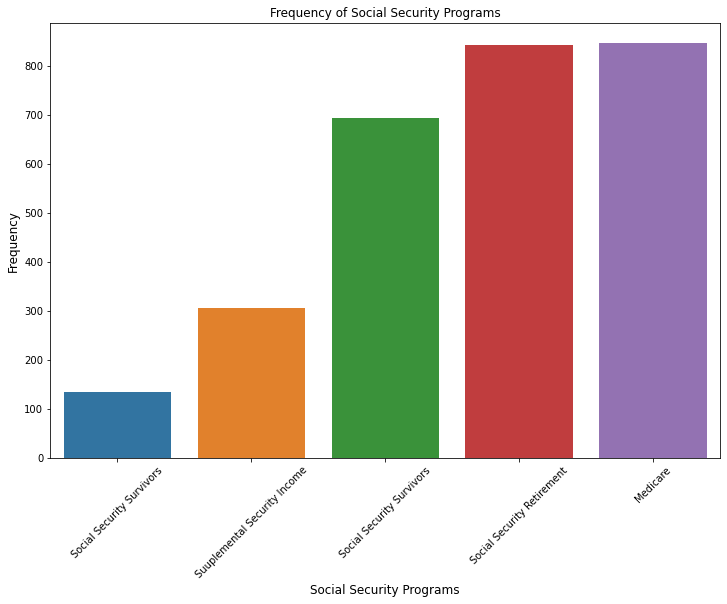

In [165]:
plt.figure(figsize = (12,8))
sns.barplot(x = ssapgm.index,y = ssapgm.values).set_xticklabels(['Social Security Survivors','Suuplemental Security Income',
                                                                'Social Security Survivors','Social Security Retirement','Medicare'])
# Set title
plt.title('Frequency of Social Security Programs')

# Set ylabel
plt.ylabel('Frequency',fontsize = 12)

# Set xlabel
plt.xlabel('Social Security Programs',fontsize = 12)

# Set xticks
plt.xticks(
    rotation=45, 
    fontweight='light'
);

The **Medicare** and **Social Security Retirement** programmes are the most popular SSPs that people would apply for whereas the **Social Security Survivors** Programme is the least popular. This analysis would help us to make well-informed recommendations on promoting specific SSPs that would appeal more to the masses. 

#### `SSA_RECV`

In [166]:
df['SSA_RECV'].value_counts(dropna = False,normalize = True) * 100

2.0    72.333129
1.0    26.660003
NaN     1.006868
Name: SSA_RECV, dtype: float64

In [167]:
# The null values would be dropped since it makes up <1% of SSA_RECV
df.dropna(subset= ['SSA_RECV'],inplace = True)

# Renaming the classes for ease of reference: 1 = yes, 0 = no
df['SSA_RECV'] = df['SSA_RECV'].replace(2,0)


**`SSA_APPLY`**

In [168]:
# Frequency of answers to SSA_APPLY
df.SSA_APPLY.value_counts(dropna = 
                          False).sort_index()

1.0     2516
2.0    97614
NaN     7823
Name: SSA_APPLY, dtype: int64

In [169]:
ssa_df = pd.DataFrame({
            'Response(value)':[i for i in df.SSA_APPLY.value_counts(dropna = False).sort_index().index],
            'Response(actual)':['Did Apply','Didnt Apply','Missing'],
            'Number':[i for i in df.SSA_APPLY.value_counts(dropna = False).sort_index().values],
            'Percentage' : [round(i*100,3) for i in df.SSA_APPLY.value_counts(dropna = False,normalize = True).sort_index().values]})
ssa_df


Response(value) Response(actual)  Number  Percentage
0              1.0        Did Apply    2516       2.331
1              2.0      Didnt Apply   97614      90.423
2              NaN          Missing    7823       7.247

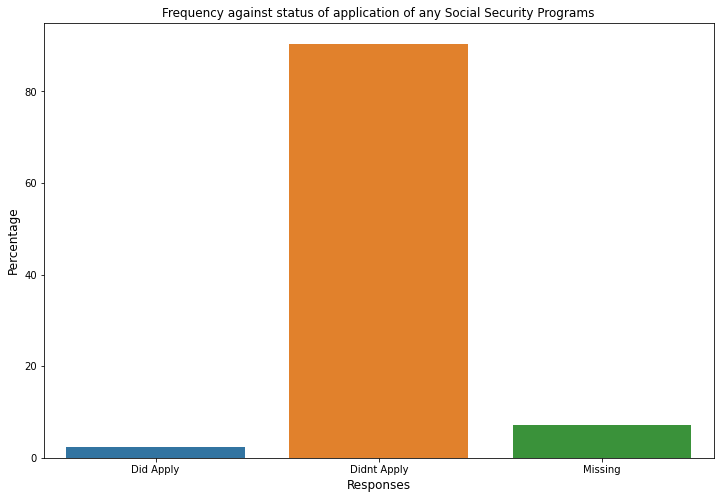

In [170]:
# Plotting frequency against status of application of SSP
plt.figure(figsize = (12,8))
sns.barplot(x = ssa_df['Response(actual)'], y = ssa_df['Percentage'])

# Set title 
plt.title('Frequency against status of application of any Social Security Programs')

# Set xlabel
plt.xlabel('Responses',fontsize = 12)

# Set ylabel
plt.ylabel('Percentage',fontsize = 12);

Majority of the respondents did not apply for any SSP and thus there is a large percentage of missing values in `SSAPGM` columns. Since only around 2% of the respondents applied for at least one SSP, this feature and associated `SSAPGM` features can be dropped. The `SSA_RECV` is sufficient to account for the effect of SSP programmes on the mental health of people. 

In [171]:
# Drop SSA_APPLY and SSAPGM features to prevent overfitting of data
df.drop(columns = ['SSA_APPLY'],inplace = True)
df.drop(columns = [k for k in ssapgm_dict.keys()],inplace = True)

**`SSALIKELY`** <br>
Asked if response to `SSA_APPLY` is 2/no

In [172]:
# ssa_apply_df consists of all respondents that are not currently enrolled in any SSP(SSA_APPLY = 2)
ssa_apply_df = df['SSALIKELY']
ssa_apply_df.value_counts(dropna = False)

# Table for easy visualization 
ssa_apply_table = pd.DataFrame({
    'Response(value)':[i for i in ssa_apply_df.value_counts(dropna = False).sort_index().index],
    'Response(actual)':['Extremely Likely','Very Likely','Somewhat Likely','Not at all Likely','Missing'],
    'Number':[j for j in ssa_apply_df.value_counts(dropna = False).sort_index().values],
    'Percentage':[round(k*100,2) for k in ssa_apply_df.value_counts(dropna= False,normalize = True).sort_index().values]
    
})
ssa_apply_table

Response(value)   Response(actual)  Number  Percentage
0              1.0   Extremely Likely    1364        1.26
1              2.0        Very Likely    1086        1.01
2              3.0    Somewhat Likely    3182        2.95
3              4.0  Not at all Likely   71034       65.80
4              NaN            Missing   31287       28.98

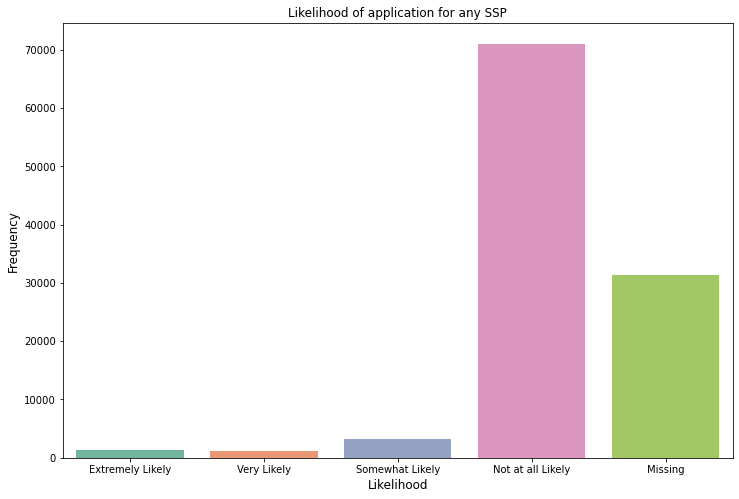

In [173]:
# Graph that shows distribution of likelihood of application for any SSP
plt.figure(figsize = (12,8))
sns.barplot(x = ssa_apply_table['Response(actual)'],y = ssa_apply_table['Number'], palette = 'Set2')

# Set title
plt.title('Likelihood of application for any SSP')

# Set xlabel
plt.xlabel('Likelihood',fontsize = 12)

# Set ylabel
plt.ylabel('Frequency',fontsize = 12);

Since `SSALIKELY` feature is similarly associated with `SSA_APPLY`, this can be dropped.

In [174]:
# Droping SSALIKELY
df.drop(columns = ['SSALIKELY'],inplace = True)

#### `SSADECISN`

In [175]:
df['SSADECISN'].value_counts(dropna = False,normalize = True)*100

1.0    59.864941
NaN    28.064991
2.0     9.057645
3.0     1.792447
4.0     1.219975
Name: SSADECISN, dtype: float64

Since this question is highly correlated to `SSALIKELY` and the decision for SSA application is secondary to the act of SSA application, it would be dropped.

In [176]:
# Dropping SSADECISN
df.drop(columns = 'SSADECISN',inplace = True)

**`SSAEXPCT`** <br>
These questions are asked only if response to the application of Social Security Programs(SSP) in the next 12 months/`SSALIKELY` is yes. 

In [177]:
ssaexpct_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('SSAEXPCT')}
ssaexpct_dict

{'SSAEXPCT3': 99.79367451926163,
 'SSAEXPCT4': 99.08024685697518,
 'SSAEXPCT2': 98.83449028436236,
 'SSAEXPCT5': 98.16782973104327,
 'SSAEXPCT1': 98.13756866053498}

In [178]:
ssaexpct = df[[i for i in ssaexpct_dict.keys()]].count()
ssaexpct

SSAEXPCT3     224
SSAEXPCT4    1002
SSAEXPCT2    1269
SSAEXPCT5    1990
SSAEXPCT1    2026
dtype: int64

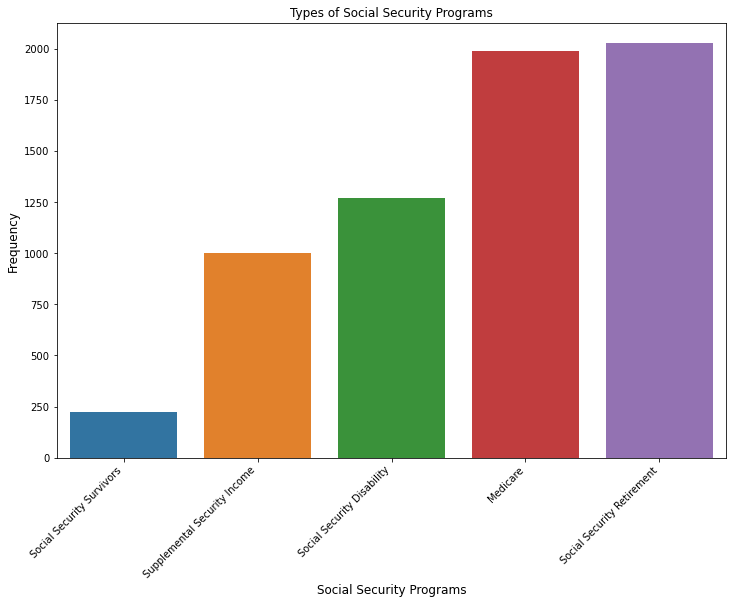

In [179]:
# Plotting graph against type of SSP program applied
plt.figure(figsize = (12,8))
ssaexpct_df = df[[k for k in ssaexpct_dict.keys()]].count()
sns.barplot(x = ssaexpct_df.index, y = ssaexpct_df.values).set_xticklabels(['Social Security Survivors','Supplemental Security Income','Social Security Disability',
                                                                            'Medicare','Social Security Retirement'])

# Set title
plt.title('Types of Social Security Programs')

# Set ylabel
plt.ylabel('Frequency',fontsize = 12)

# Set xlabel
plt.xlabel('Social Security Programs',fontsize = 12)

# Set xticks
plt.xticks(rotation = 45,horizontalalignment='right');

The bargraph above shows a preferrence for specific SSPs such as **Medicare** and **Social Security Retirement** which are consistent with the popular SSPs that people are currently enrolled in. However, given the strong correlation with `SSAPGM`, `SSA_APPLY` and `SSA_LIKLEY` as well as the low number of responses, these `SSAEXPCT` features would be removed from our dataset.

In [180]:
# Dropping all SSAEXPCT columns
df.drop(columns = [i for i in ssaexpct_dict.keys()],inplace = True)

**`PSPLANS`**

In [181]:
psplans_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('PSPLANS')}
psplans_dict

{'PSPLANS5': 98.22193285710355,
 'PSPLANS6': 97.6799845943641,
 'PSPLANS1': 97.11511127820927,
 'PSPLANS2': 96.11649595143557,
 'PSPLANS4': 96.09540490229342,
 'PSPLANS3': 91.74239575978213}

In [182]:
psplans = df[[col for col in psplans_dict.keys()]]
psplans.count()

PSPLANS5    1937
PSPLANS6    2527
PSPLANS1    3142
PSPLANS2    4228
PSPLANS4    4255
PSPLANS3    9000
dtype: int64

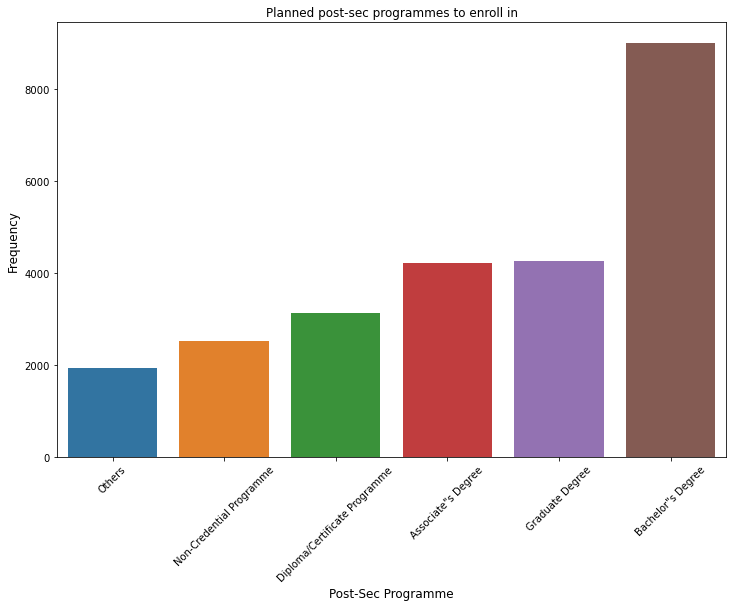

In [183]:
# Plot frequency against planned post-sec programmes
plt.figure(figsize = (12,8))
sns.barplot(x = psplans.count().index, y = psplans.count().values).set_xticklabels(['Others','Non-Credential Programme','Diploma/Certificate Programme','Associate"s Degree','Graduate Degree','Bachelor"s Degree'])

# Set title
plt.title('Planned post-sec programmes to enroll in')

# Set ylabel
plt.ylabel('Frequency',fontsize = 12)

# Set xlabel
plt.xlabel('Post-Sec Programme',fontsize = 12)

# Set xticks
plt.xticks(rotation = 45);

Distribution of the tertiary education paths that members of the households planned to pursue. Since there is an increasing prevalence of mental health issues amongst the students and young adults in the States, these features would be worth keeping.

#### Imputing missing values in `PSPLANS`
The missing values would be imputed as 0s 

In [184]:
# Replacing all null values as 0
for i in psplans_dict.keys():
    df[i] = df[i].fillna(0)

**`PSCHNG`**

In [185]:
# Looking at the frequency of missing values in PSCHNG columns
pschng_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('PSCHNG')}
pschng_dict

{'PSCHNG5': 99.77258347011949,
 'PSCHNG6': 99.55800497015159,
 'PSCHNG7': 99.51123786118423,
 'PSCHNG4': 97.9734252780809,
 'PSCHNG1': 94.67863660122327,
 'PSCHNG2': 94.01564405645065,
 'PSCHNG3': 91.59750942219695}

In [186]:
# Frequency of different changes to post-secondary plans
pschng = df[[i for i in pschng_dict.keys()]]
pschng.count()

PSCHNG5     247
PSCHNG6     481
PSCHNG7     532
PSCHNG4    2209
PSCHNG1    5798
PSCHNG2    6516
PSCHNG3    9159
dtype: int64

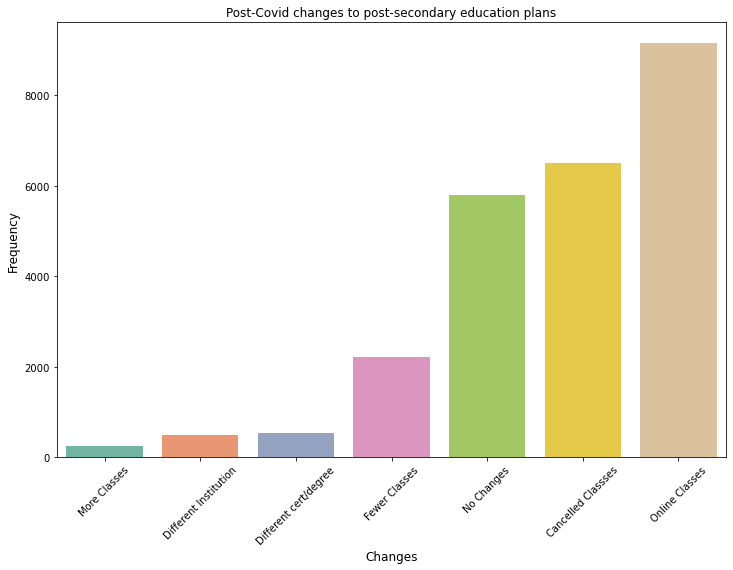

In [187]:
# Looking at the distribution of changes to post-secondary education
plt.figure(figsize = (12,8))
pschng = df[list(pschng_dict.keys())].count()
sns.barplot(x = pschng.index,y = pschng.values,palette = 'Set2').set_xticklabels(['More Classes','Different Institution','Different cert/degree','Fewer Classes',
                                                                'No Changes','Cancelled Classses','Online Classes']);

# Set title
plt.title('Post-Covid changes to post-secondary education plans')

# Set xlabel
plt.xlabel('Changes',fontsize = 12)

# Set ylabel
plt.ylabel('Frequency',fontsize = 12)

# Set xticks
plt.xticks(rotation = 45);

These questions asked for changes to post-secondary education plans if there are members in the household who planned to enroll in post-secondary classes(`TNUM_PS` > 0). Among those pursuing post-secondary programs, many of the classes are now online or are cancelled. Since there is a substantial impact of COVID on the educational landscape, these features would be kept. 

**`TNUM_PS`**

In [188]:
# Table for ease of view
tnum_df = pd.DataFrame({
    'Response(values)':[i for i in df['TNUM_PS'].value_counts(dropna = False).sort_index().index],
    'Response(actual)':['0 Member','1 Member','2 Members','3 Members','Missing'],
    'Number':[i for i in df['TNUM_PS'].value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df['TNUM_PS'].value_counts(dropna = False,normalize = True).sort_index().values]
})
tnum_df

Response(values) Response(actual)  Number  Percentage
0               0.0         0 Member   64170       59.44
1               1.0         1 Member   15835       14.67
2               2.0        2 Members    4531        4.20
3               3.0        3 Members    1276        1.18
4               NaN          Missing   22141       20.51

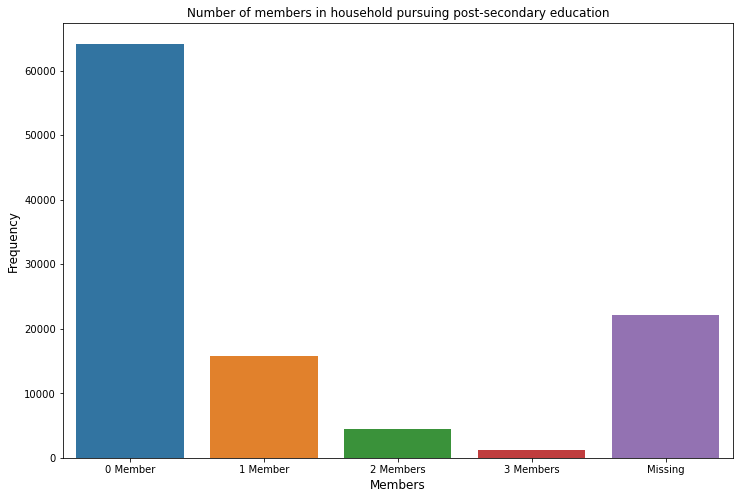

In [189]:
# Frequency of members who are pursuing post-secondary education
plt.figure(figsize = (12,8))
sns.barplot(x = tnum_df['Response(actual)'], y = tnum_df['Number'])

# Set title
plt.title('Number of members in household pursuing post-secondary education')

# Set xlabel
plt.xlabel('Members',fontsize = 12)

# Set yabel
plt.ylabel('Frequency',fontsize = 12);

Majority of the households do not have any members pursuing post-secondary classes. Since this feature does not directly influence the mental well-being of people, this feature can be dropped.

**Dropping `TNUM_PS` and imputing `PSCHG` features**

In [190]:
# Replace all the null values with 'missing'
df.drop(columns = ['TNUM_PS'],inplace= True)

**`PSWHYCHG`** <br>
These questions asked for reasons behind changes to post-secondary education plans as stated above.

In [191]:
pswhychg_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('PSWHYCHG')}
pswhychg_dict

{'PSWHYCHG2': 99.80834655344746,
 'PSWHYCHG3': 98.95645156853216,
 'PSWHYCHG9': 98.61257576730154,
 'PSWHYCHG5': 98.53187957927942,
 'PSWHYCHG6': 98.0165243785018,
 'PSWHYCHG8': 96.57499701974305,
 'PSWHYCHG7': 96.57041200905998,
 'PSWHYCHG1': 95.13622066739416,
 'PSWHYCHG4': 92.12753665716042}

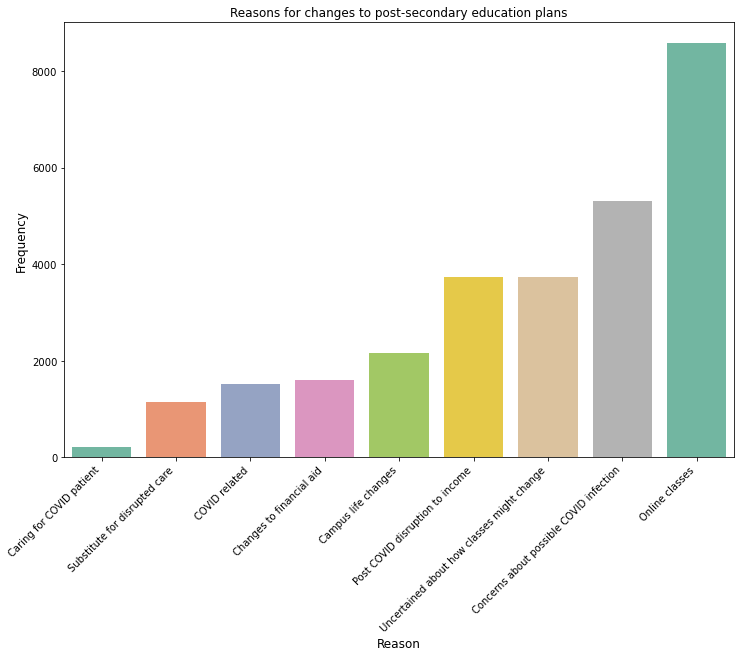

In [192]:
# Plotting graph of reasons for changes to post-sec education plans
pswhychg_df = df[[k for k in pswhychg_dict.keys()]].count()
plt.figure(figsize = (12,8))
sns.barplot(x = pswhychg_df.index,y = pswhychg_df.values,palette = 'Set2').set_xticklabels(['Caring for COVID patient','Substitute for disrupted care','COVID related',
                                                                          'Changes to financial aid','Campus life changes','Post COVID disruption to income','Uncertained about how classes might change',
                                                                          'Concerns about possible COVID infection','Online classes'])
# Set title
plt.title('Reasons for changes to post-secondary education plans')

# Set xlabel
plt.xlabel('Reason',fontsize = 12)

# Set ylabel
plt.ylabel('Frequency',fontsize = 12)

# Set xticks
plt.xticks(rotation = 45,horizontalalignment='right');

In [193]:
# Total number of responses in PSWHYCHNG columns
pswhychng = df[[col for col in pswhychg_dict.keys()]]
pswhychng.count().sum()

27962

There is a considerable number of total responses(27988) to these questions and they highlight important concerns that the population has which would influence their educational experience. The missing values would be imputed as 0s instead and the `PSCHNG`features would be dropped since they overlap with `PSWHYCHNG` features and are less explanatory. This helps to prevent overfitting of data.

**Impute missing `PSWHYCHG` values, drop `PSCHNG` columns**

In [194]:
# Imputing missing PSWHYCHG values as 0
for i in pswhychg_dict.keys():
    df[i] = df[i].fillna(0)

# Dropping PSCHNG features:
df.drop(columns = [i for i in pschng_dict.keys()],inplace = True)

**`SNAPMNTH`**

In [195]:
snapmnth_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('SNAPMNTH')}
snapmnth_dict

{'SNAPMNTH9': 100.0,
 'SNAPMNTH10': 100.0,
 'SNAPMNTH11': 100.0,
 'SNAPMNTH12': 100.0,
 'SNAPMNTH1': 96.57224601333321,
 'SNAPMNTH2': 96.51539188086308,
 'SNAPMNTH3': 96.03671676555007,
 'SNAPMNTH4': 95.60297475493118,
 'SNAPMNTH5': 95.29486203702855,
 'SNAPMNTH6': 95.07294751996773,
 'SNAPMNTH8': 94.97024328066685,
 'SNAPMNTH7': 94.93539719947547}

In [196]:
# Renaming and reordering of columns for easy viewing 
snapmnth_df = df[[col for col in snapmnth_dict.keys()]]
snapmnth_df = snapmnth_df.rename(columns = {
    'SNAPMNTH1':'Jan',
    'SNAPMNTH2':'Feb',
    'SNAPMNTH3':'Mar',
    'SNAPMNTH4':'Apr',
    'SNAPMNTH5':'May',
    'SNAPMNTH6':'Jun',
    'SNAPMNTH7':'Jul',
    'SNAPMNTH8':'Aug',
    'SNAPMNTH9':'Sep',
    'SNAPMNTH10':'Oct',
    'SNAPMNTH11':'Nov',
    'SNAPMNTH12':'Dec'
})
snapmnth_df = snapmnth_df[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]

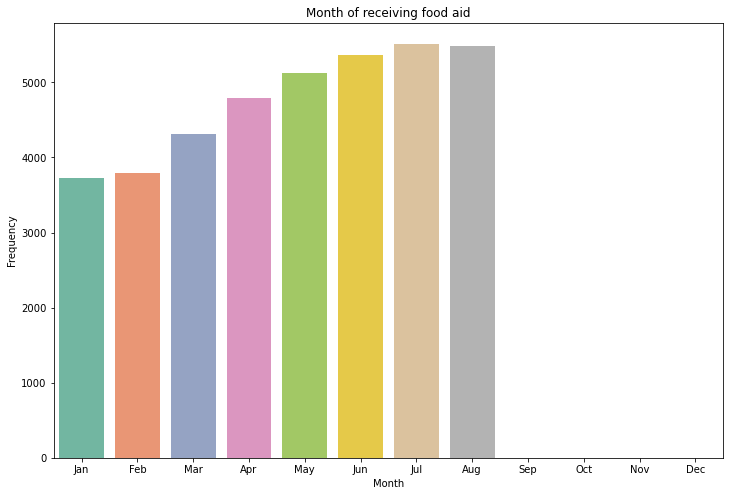

In [197]:
# Graph showing the months when the food benefits/stamps were received
plt.figure(figsize = (12,8))

sns.barplot(x = [col for col in snapmnth_df.columns],y = [snapmnth_df[col].count() for col in snapmnth_df.columns],palette = 'Set2')
plt.title('Month of receiving food aid')
plt.ylabel('Frequency')
plt.xlabel('Month');

There seems to be an increasing trend in the number of food aid received over the months but as it is an ongoing survey and responses were collected till the end of August, this dataset did not account for food aids received after August. This shows a possible correlation between the pandemic and food security since more people are applying for SNAP/Food Programmes.

**`SNAP_YN`**

In [198]:
df['SNAP_YN'].value_counts(dropna = False)

2.0    91193
NaN     9892
1.0     6868
Name: SNAP_YN, dtype: int64

In [199]:
# Looking at the percentage of people who received the SNAP receipt
df['SNAP_YN'].value_counts(normalize = True, dropna = False) * 100

2.0    84.474725
NaN     9.163247
1.0     6.362028
Name: SNAP_YN, dtype: float64

In [200]:
snap_yn_df = pd.DataFrame({
    'Responses(values)':[i for i in df['SNAP_YN'].value_counts(dropna = False).sort_index().values],
    'Responses(actual)':['Yes','No','Missing'],
    'Number':[i for i in df['SNAP_YN'].value_counts(dropna = False).sort_index().index],
    'Percentage':[round(i*100,2) for i in df['SNAP_YN'].value_counts(dropna = False,normalize = True).sort_index().values]
})
snap_yn_df

Responses(values) Responses(actual)  Number  Percentage
0               6868               Yes     1.0        6.36
1              91193                No     2.0       84.47
2               9892           Missing     NaN        9.16

Based on the `SNAP_YN` column which indicates if households have benefitted from the SNAP program, majority of the population responded that they **do not** have/require access to such an aid which answers for the high null values in the `SNAPMNTH` columns. The SNAP is a state-administered programme that mainly targets households with children, elderly or disabled members where more than half of the applicants are children. This would be a useful indicator of food scarcity among the households. 

Since there is a significant number of nonresponses in the `SNAP_YN` feature, they would be grouped under a **Missing** class. The `SNAPMNTH` features are not useful in providing any much value than the `SNAP_YN` features and thus can be dropped.

**Regrouping, dropping and imputing `SNAP_YN` and `SNAPMNTH` features**

In [201]:
# Reclassifying null values in SNAP_YN under a Missing class 
df['SNAP_YN'].fillna('Missing',inplace = True)

# Dropping SNAPMNTH columns
df.drop(columns = [k for k in snapmnth_dict.keys()],inplace = True)

**`CHNGHOW`** <br>
Questions that ask how spending/shopping changed

In [202]:
chnghow_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('CHNGHOW')}
chnghow_dict

{'CHNGHOW11': 97.05550613932931,
 'CHNGHOW5': 96.35766751336531,
 'CHNGHOW3': 92.7089160117743,
 'CHNGHOW10': 90.963860945796,
 'CHNGHOW7': 90.3889006061384,
 'CHNGHOW12': 82.2761827035057,
 'CHNGHOW9': 76.3312578518308,
 'CHNGHOW2': 72.62381821349643,
 'CHNGHOW8': 70.78797993599325,
 'CHNGHOW4': 64.35245894122933,
 'CHNGHOW1': 48.130691144510365,
 'CHNGHOW6': 44.66900807878883}

In [203]:
chnghow = df[[k for k in chnghow_dict.keys()]]
chnghow.count()

CHNGHOW11     3202
CHNGHOW5      3961
CHNGHOW3      7936
CHNGHOW10     9831
CHNGHOW7     10466
CHNGHOW12    19292
CHNGHOW9     25752
CHNGHOW2     29807
CHNGHOW8     31791
CHNGHOW4     38814
CHNGHOW1     56469
CHNGHOW6     60210
dtype: int64

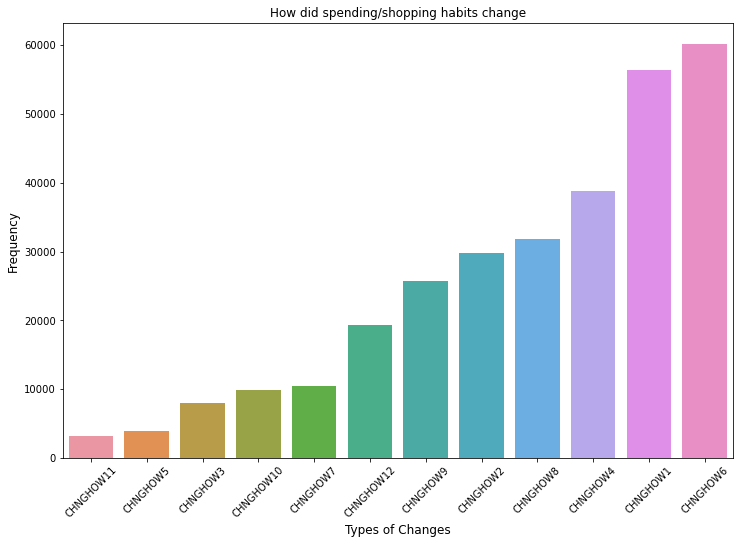

In [204]:
# plot frequenecy against changing spending/shopping habits
plt.figure(figsize = (12,8))
sns.barplot(x = [i for i in chnghow.columns], y = [chnghow[i].count() for i in chnghow.columns])

# Set title
plt.title('How did spending/shopping habits change')

# Set ylabel
plt.ylabel('Frequency',fontsize = 12)

# Set xlabel
plt.xlabel('Types of Changes',fontsize = 12)

# Set xticks
plt.xticks(rotation = 45);

|Features|Labels|
|--------|------|
|CHNGHOW1|Made more online purchases|
|CHNGHOW2|Made more curbside pick-up purchases|
|CHNGHOW3|Made more in-store purchases|
|CHNGHOW4|Made more electronic payments|
|CHNGHOW5|Made more cash purchases|
|CHNGHOW6|Avoid eating at restaurants|
|CHNGHOW7|Resumed eating at restaurants|
|CHNGHOW8|Cancelled/postponed in-person medical/dental appointments|
|CHNGHOW9|Attended in-person medical/dental appointments|
|CHNGHOW10|Cancelled/postponed housekeeping/caregiving arrangements|
|CHNGHOW11|Resumed/started new housekeeping/caregiving services|
|CHNGHOW12|No changes to spending/shopping habits|

In [205]:
chnghow.count().sum()

297531

The top few features show that respondents prefer to reduce social interactions by avoiding public places and resorting to cashless payments instead.


**`WHYCHNGD`** <br>
Reasons behind changes to household spendings

In [206]:
whychng_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('WHYCHNGD')}
whychng_dict

{'WHYCHNGD6': 99.37735554923843,
 'WHYCHNGD12': 98.48236146390221,
 'WHYCHNGD8': 97.80836489349021,
 'WHYCHNGD13': 95.7817901715711,
 'WHYCHNGD10': 95.54703762459766,
 'WHYCHNGD4': 95.15180970371661,
 'WHYCHNGD2': 93.36457253945402,
 'WHYCHNGD7': 86.5136495768035,
 'WHYCHNGD9': 83.58015974177219,
 'WHYCHNGD5': 80.9474466075506,
 'WHYCHNGD1': 75.7691355420858,
 'WHYCHNGD11': 69.01541480591649,
 'WHYCHNGD3': 48.63595932178522}

In [207]:
whychng = df[[k for k in whychng_dict.keys()]]
whychng.count()

WHYCHNGD6       677
WHYCHNGD12     1650
WHYCHNGD8      2380
WHYCHNGD13     4590
WHYCHNGD10     4852
WHYCHNGD4      5273
WHYCHNGD2      7224
WHYCHNGD7     14689
WHYCHNGD9     17877
WHYCHNGD5     20746
WHYCHNGD1     26377
WHYCHNGD11    33718
WHYCHNGD3     55897
dtype: int64

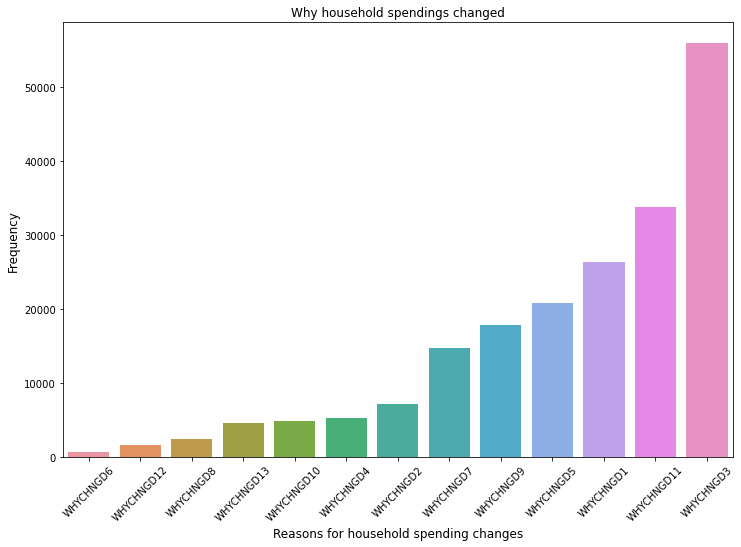

In [274]:
# Graph of reasons behind household spending changes against frequency
plt.figure(figsize = (12,8))
sns.barplot(y = [i for i in whychng.count().values],x = [i for i in whychng.count().index])

# Set title
plt.title('Why household spendings changed')

# Set ylabel
plt.ylabel('Frequency',fontsize = 12)

# Set xlabel
plt.xlabel('Reasons for household spending changes',fontsize = 12)

# Set xticks
plt.xticks(rotation = 45);

|Features|Labels|
|--------|------|
|WHYCHNGD1|Limited shop opening hours|
|WHYCHNGD2|Extension of shop opening hours|
|WHYCHNGD3|Concerns with contaminating virus/interacting with high-risk individuals|
|WHYCHNGD4|Not concerned with contaiminating virus/interacting with high-risk individuals
|WHYCHNGD5|Loss of income|
|WHYCHNGD6|Increased income|
|WHYCHNGD7|Concerns about job-loss/pay-cut|
|WHYCHNGD8|Not concerned about job-loss/pay-cut|
|WHYCHNGD9|Work from home/telecomm|
|WHYCHNGD10|Resumed working onsite|
|WHYCHNGD11|Concerns about economy|
|WHYCHNGD12|No concerns about economy|

In [208]:
# Total number of responses in WHYCHNGD features
whychng.count().sum()

195950

There is a large number of households who are spending less during this pandemic due to worries regarding **risk of virus infection**, **economical landscape** as well as a **loss of income**. These responses have highlighted the social and economical changes that result. This could explain for the changes that were described in `CHNGHOW` where people have reduced possible social interactions. The large number of missing values in `WHYCHNGD6` and `WHYCHNGD12` is because these changes are not applicable to the respondents. Since people could select more than one reason, the total number of responses in these columns are more than the total number rows in data. 

**Removing `CHNGHOW` features** <br>

Since `WHYCHNGD` and `CHNGHOW` are correlated and `WHYCHNGD` features provide valuable explanations for changes in lifestyle habits of people, to prevent overfitting of our model, the `CHNGHOW` columns would be dropped.

In [209]:
# Dropping all CHNGHOW columns
df.drop(columns = [col for col in chnghow_dict.keys()],inplace = True)

**Imputing missing values** <br>

All null values in `WHYCHNGD` features would be replaced with 0s.

In [210]:
# Replacing all null values with 0s in WHYCHNGD
for i in whychng_dict.keys():
    df[i] = df[i].fillna(0)

**`FOODSUFRSN`**

In [211]:
foodsufrsn_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('FOODSUFRSN')}
foodsufrsn_dict

{'FOODSUFRSN4': 98.2980440344426,
 'FOODSUFRSN2': 96.61351110948088,
 'FOODSUFRSN3': 90.78137752060962,
 'FOODSUFRSN1': 88.01478207444224,
 'FOODSUFRSN5': 87.0262537711713}

In [212]:
foodsufrsn_df = df[[col for col in foodsufrsn_dict.keys()]]
foodsufrsn_df.count()

FOODSUFRSN4     1850
FOODSUFRSN2     3678
FOODSUFRSN3    10021
FOODSUFRSN1    13045
FOODSUFRSN5    14119
dtype: int64

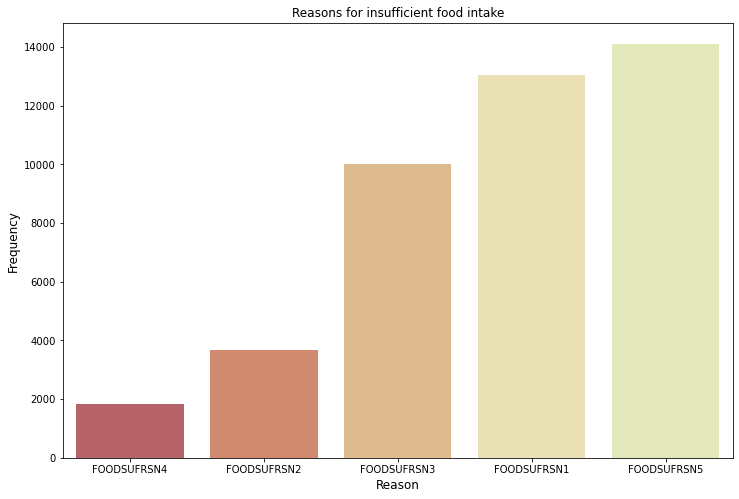

In [280]:
# Plot frequency against reasons for insufficient food intake
plt.figure(figsize = (12,8))
sns.barplot(x = [col for col in foodsufrsn_df.count().index],y = [i for i in foodsufrsn_df.count().values])

# Set title 
plt.title('Reasons for insufficient food intake')

# Set xlabel
plt.xlabel('Reason',fontsize = 12)

# Set ylabel
plt.ylabel('Frequency',fontsize = 12);

|Features|Labels|
|--------|------|
|FOODSUFRSN1|Could not afford to buy|
|FOODSUFRSN2|Could not go out to buy(no transportation/health problems)
|FOODSUFRSN3|Afraid to go/Did not want to go out|
|FOODSUFRSN4|Could not get groceries/meals delivered|
|FOODSUFRSN5|Limited selection of food|


**Imputing missing values** <br>

All null values in `FOODSUFRSN` features would be replaced with 0s.

In [213]:
for i in foodsufrsn_dict.keys():
    df[i] = df[i].fillna(0)

These questions are asked only if `CURFOODSUF` is answered appropriately. Nevertheless, there is an alarming number of people who are unable to afford food.

**`CURFOODSUF`** <br>
Current food sufficiency

In [214]:
curfoodsuf_df = pd.DataFrame({
    'Responses(values)':[i for i in df.CURFOODSUF.value_counts(dropna = False).sort_index().index],
    'Responses(actual)':['Enough of the food we want','Enough but not always the food we want','Sometimes not enough to eat','Often not enough to eat','Missing'],
    'Number':[i for i in df.CURFOODSUF.value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df.CURFOODSUF.value_counts(dropna = False,normalize = True).sort_index().values]})
curfoodsuf_df

Responses(values)                       Responses(actual)  Number  \
0                1.0              Enough of the food we want   66235   
1                2.0  Enough but not always the food we want   26194   
2                3.0             Sometimes not enough to eat    5179   
3                4.0                 Often not enough to eat    1370   
4                NaN                                 Missing    8975   

   Percentage  
0       61.36  
1       24.26  
2        4.80  
3        1.27  
4        8.31

**`PRIFOODSUF`**

In [215]:
prifoodsuf_df = pd.DataFrame({
    'Responses(values)':[i for i in df.PRIFOODSUF.value_counts(dropna = False).sort_index().index],
    'Responses(actual)':['Enough of the food we want','Enough but not always the food we want','Sometimes not enough to eat','Often not enough to eat','Missing'],
    'Number':[i for i in df.PRIFOODSUF.value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df.PRIFOODSUF.value_counts(dropna = False,normalize = True).sort_index().values]})
prifoodsuf_df

Responses(values)                       Responses(actual)  Number  \
0                1.0              Enough of the food we want   75441   
1                2.0  Enough but not always the food we want   18339   
2                3.0             Sometimes not enough to eat    4067   
3                4.0                 Often not enough to eat    1165   
4                NaN                                 Missing    8941   

   Percentage  
0       69.88  
1       16.99  
2        3.77  
3        1.08  
4        8.28

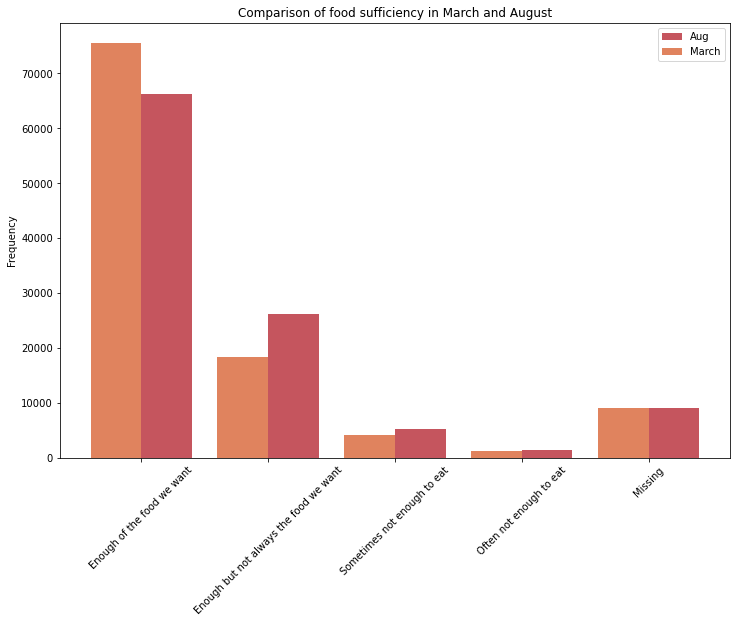

In [284]:
# Plot graph of frequency against food sufficiency in March and Aug
plt.figure(figsize = (12,8))
width = 0.8 
ind = np.arange(1,10,2)
plt.bar(ind+width, curfoodsuf_df['Number'], label='Aug')
plt.bar(ind,prifoodsuf_df['Number'], label='March')

plt.ylabel('Frequency')
plt.title('Comparison of food sufficiency in March and August')

plt.xticks(ind + width / 2, curfoodsuf_df['Responses(actual)'])
plt.legend()
plt.xticks(rotation = 45);

`PRIFOODSUF` was asked with regards to food sufficiency before 13 March which is the date that President Donald Trump declared a national state of emergency to cope with the pandemic. The implications that result are economical standstill, hikes in unemploment rates and implementations of stay-at-home orders. These factors could be the underlying reasons for the slight increase in food insufficiency going from March to August. To account for the rise in food insufficiency, a new feature would be engineered by taking the difference of `PRIFOODSUF` and `CURFOODSUF`

**`FOODSUF`** <br>
New feature which indicates if accessibility of food has changed after the declaration of state of emergency due to COVID

In [216]:
df['FOODSUF'] = df['PRIFOODSUF'] - df['CURFOODSUF']
df['FOODSUF'].value_counts(dropna = False).sort_index(ascending = False)

 3.0       63
 2.0      286
 1.0     4673
 0.0    79712
-1.0    12338
-2.0     1446
-3.0      302
 NaN     9133
Name: FOODSUF, dtype: int64

In [217]:
df['FOODSUF'] = df['FOODSUF'].map(lambda x: 'Less available' if x < 0 else ('More available' if x > 0 else x))
df['FOODSUF'] = df['FOODSUF'].replace(0,'Unchanged')
df['FOODSUF'] = df['FOODSUF'].replace(np.nan,'Missing')
df['FOODSUF'].value_counts(dropna = False)

Unchanged         79712
Less available    14086
Missing            9133
More available     5022
Name: FOODSUF, dtype: int64

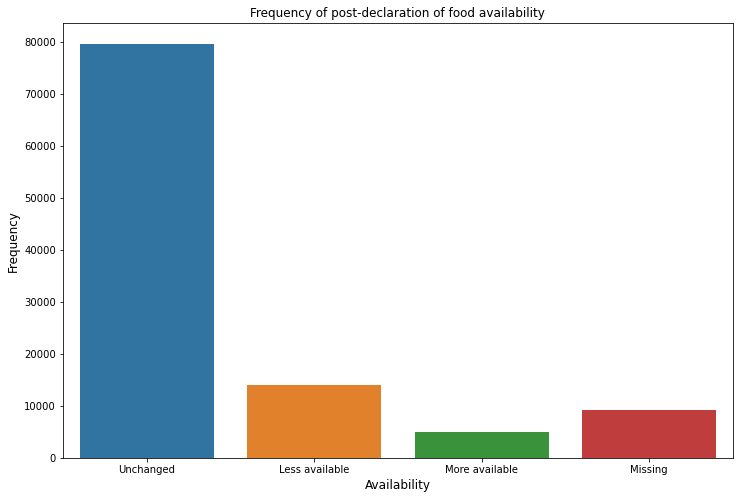

In [218]:
# Plot graph of frequency against post-declaration of food availability
plt.figure(figsize = (12,8))
sns.barplot(x = df['FOODSUF'].value_counts().index,y = df['FOODSUF'].value_counts().values,order = ['Unchanged','Less available','More available','Missing'])

# Set title
plt.title('Frequency of post-declaration of food availability')

# Set xlabel
plt.xlabel('Availability',fontsize = 12)

# Set ylabel
plt.ylabel('Frequency',fontsize = 12);

#### Drop `PRIFOODSUF`,`CURFOODSUF`, `CHILDFOOD` and `FOODSUFRSN` features
Since data in all of these features is accounted for in `FOODSUF`, they would be dropped.

In [219]:
# Drop the 2 features
df.drop(columns = ['PRIFOODSUF','CURFOODSUF','CHILDFOOD'],inplace = True)
df.drop(columns = [k for k in foodsufrsn_dict.keys()],inplace = True)

**`EVICT`**

Measuring the likelihood of eviction in the next 2 months. This question is only asked if `TENURE` is answered as 3/Rented and `RENTCUR` is 2/no

In [220]:
# Removal of missing values from EVICT
df['EVICT'].value_counts(dropna = False,normalize = True) * 100

NaN    97.722157
3.0     0.705863
2.0     0.684557
4.0     0.555797
1.0     0.331626
Name: EVICT, dtype: float64

Since most of the data are missing and `EVICT` is dependent on responses to `TENURE` and `RENTCUR`, this column can be dropped. The other columns would be sufficient to account for the status of eviction in our model.

**`RENTCUR`**

In [223]:
# Percentage of RENTCUR missing
sorted_percent_null['RENTCUR']

80.0662075542636

In [224]:
df['RENTCUR'].value_counts(dropna = False)

NaN    86251
1.0    19210
2.0     2492
Name: RENTCUR, dtype: int64

In [225]:
rentcur_df = pd.DataFrame({
    'Responses(values)':[i for i in df['RENTCUR'].value_counts(dropna = False).sort_index().index],
    'Responses(actual)':['Yes','No','Missing'],
    'Number':[i for i in df['RENTCUR'].value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df['RENTCUR'].value_counts(dropna = False,normalize = True).sort_index().values]
})

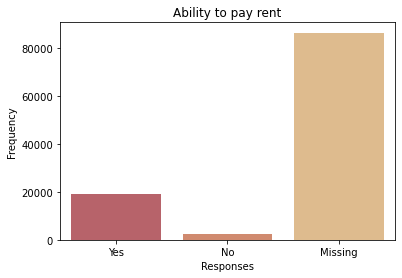

In [294]:
# Plot graph of frequency against ability to pay rent
sns.barplot(x = rentcur_df['Responses(actual)'], y = rentcur_df['Number'])

# Set title
plt.title('Ability to pay rent')

# Set xlabel
plt.xlabel('Responses')

# Set ylabel
plt.ylabel('Frequency');

**`MORTCUR`** <br>
Question asking if households are able to afford mortgage payments

In [226]:
df['MORTCUR'].value_counts(dropna = False).sort_index()

1.0    41323
2.0     3177
NaN    63453
Name: MORTCUR, dtype: int64

**`FORCLOSE`** <br>
Similar to `EVICT` which asks respondents about the likelihood of losing the ability to pay mortgage and thus obligated to give up their homes

In [227]:
df['FORCLOSE'].value_counts(dropna = False)

NaN    104807
4.0      1447
3.0      1146
2.0       429
1.0       124
Name: FORCLOSE, dtype: int64

**`TENURE`**

In [228]:
# Percentage of TENURE missing
sorted_percent_null['TENURE']

17.884292670401923

In [229]:
tenure_df = pd.DataFrame({
    'Responses(values)':[i for i in df.TENURE.value_counts(dropna = False).sort_index().index],
    'Responses(actual)':['Owned free and clear','Owned with mortgage/loan','Rented','Occupied without paying','Missing'],
    'Number':[i for i in df.TENURE.value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df.TENURE.value_counts(dropna = False,normalize = True).sort_index().values]})
tenure_df


Responses(values)         Responses(actual)  Number  Percentage
0                1.0      Owned free and clear   21824       20.22
1                2.0  Owned with mortgage/loan   44659       41.37
2                3.0                    Rented   21776       20.17
3                4.0   Occupied without paying    1149        1.06
4                NaN                   Missing   18545       17.18

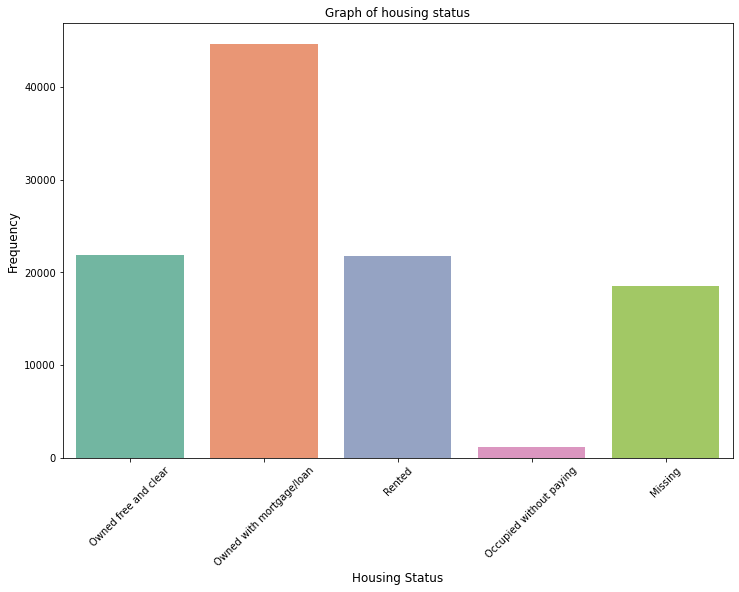

In [232]:
# Plot frequency against housing status
plt.figure(figsize = (12,8))
sns.barplot(x = tenure_df['Responses(actual)'], y = tenure_df['Number'], palette = 'Set2')
plt.title('Graph of housing status')
plt.xticks(rotation = 45)
plt.ylabel('Frequency',fontsize = 12)
plt.xlabel('Housing Status',fontsize = 12);


#### Imputing missing data
Since there is a large number of missing values and `TENURE` is an indicator of the financial status of people, it should not be dropped and the missing values are classified under a **Missing** class.

In [233]:
# Reclassifying null TENURE values
df['TENURE'] = df['TENURE'].fillna('Missing')

#### Merging of `RENTCUR` and `MORTCUR` into one feature

In [234]:
# Function to regroup values 
def housepay(row):
    if row['TENURE'] == 2 and row['MORTCUR'] == 1:
        return 'Yes'
    elif row['TENURE'] == 2 and row['MORTCUR'] == 2:
        return 'No'
    elif row['TENURE'] == 3 and row['RENTCUR'] == 1:
        return 'Yes'
    elif row['TENURE'] == 3 and row['RENTCUR'] == 2:
        return 'No'
    else:
        return 'Missing'

In [235]:
# New feature to indicate if households are able to afford their houses
df['HOUSEPAY'] = df.apply(housepay,axis = 1)
df['HOUSEPAY'].value_counts()

Yes        60533
Missing    41751
No          5669
Name: HOUSEPAY, dtype: int64

#### Drop `RENTCUR`,`MORTCUR`,`EVICT`,`FORCLOSE`

Since `RENTCUR`,`MORTCUR`,`EVICT`,`FORCLOSE` are highly correlated to `HOUSEPAY` and could be a substitute for one another,all would be removed to prevent overfitting of our model.

In [236]:
# Dropping columns
df.drop(columns = ['EVICT','FORCLOSE','RENTCUR','MORTCUR'],inplace = True)

#### `MORTCONF`

In [237]:
df['MORTCONF'].value_counts(dropna = False).sort_index()

1.0     3212
2.0     5087
3.0    11488
4.0    45410
5.0      876
NaN    41880
Name: MORTCONF, dtype: int64

Since this feature is highly correlated to `HOUSEPAY`, this would be dropped.

In [240]:
# Dropping MORTCONF feature
df.drop(columns = ['MORTCONF'],inplace = True)

**`TEACH`**

In [241]:
teach_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('TEACH')}
teach_dict

{'TEACH5': 97.79094185289452,
 'TEACH3': 97.16646339785972,
 'TEACH4': 96.57224601333321,
 'TEACH1': 94.75199677215248,
 'TEACH2': 85.5700543782267}

In [242]:
teach_df = df[[k for k in teach_dict.keys()]]
teach_df.count()

TEACH5     2404
TEACH3     3085
TEACH4     3736
TEACH1     5718
TEACH2    15725
dtype: int64

In [243]:
# Null values in each TEACH column
teach_df.isnull().sum()

TEACH5    105549
TEACH3    104868
TEACH4    104217
TEACH1    102235
TEACH2     92228
dtype: int64

|Features|Labels|
|--------|------|
|TEACH1|Cancelled classes|
|TEACH2|Changed to e-learning|
|TEACH3|Changed to mailed school materials|
|TEACH4|Changed to other ways|
|TEACH5|No changes|

Since the `TEACH` features have many missing values and are secondary to impacting the mental health of adults, they would be dropped

In [244]:
# Drop all other TEACH features:
df.drop(columns = [k for k in teach_dict.keys()],inplace = True)

These questions are only asked if `ENROLL` are answered with yes/1

In [245]:
enroll_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('ENROLL')}
enroll_dict

{'ENROLL2': 97.17379941495264,
 'ENROLL3': 92.86939138568194,
 'ENROLL1': 78.04696884943742}

In [246]:
for i in enroll_dict.keys():
    print(df[i].value_counts(dropna = False))
    print('')

NaN    104877
1.0      3076
Name: ENROLL2, dtype: int64

NaN    100204
1.0      7749
Name: ENROLL3, dtype: int64

NaN    84036
1.0    23917
Name: ENROLL1, dtype: int64



#### Drop `ENROLL` features
Since most of the values in `ENROLL` features are missing and are questions that surround the well-being of children and not our target audience, these would be dropped.

In [247]:
df.drop(columns = [k for k in enroll_dict.keys()],inplace = True)

**`SPNDSRC`**

In [248]:
spndsrc_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('SPNDSRC')}
spndsrc_dict

{'SPNDSRC8': 95.55070563314413,
 'SPNDSRC7': 95.52594657545552,
 'SPNDSRC4': 92.43381537078982,
 'SPNDSRC5': 89.69197898231103,
 'SPNDSRC6': 78.46053681305078,
 'SPNDSRC3': 77.1886548495658,
 'SPNDSRC2': 76.1166793518629,
 'SPNDSRC1': 29.98413586303656}

In [249]:
spndsrc_df = df[[i for i in spndsrc_dict.keys()]]
spndsrc_df.count()

SPNDSRC8     4841
SPNDSRC7     4870
SPNDSRC4     8237
SPNDSRC5    11228
SPNDSRC6    23451
SPNDSRC3    24836
SPNDSRC2    25994
SPNDSRC1    76225
dtype: int64

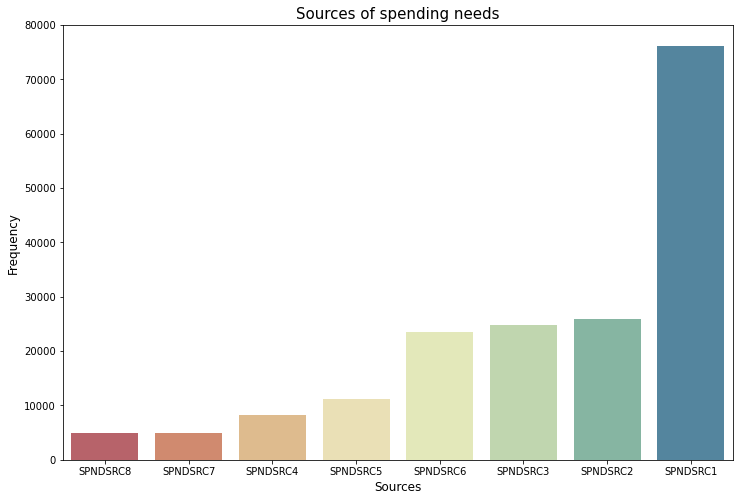

In [317]:
# Plot graph of frequency against sources of spending needs
plt.figure(figsize = (12,8))
sns.set_palette("Spectral", 8, .75)
sns.barplot(x = spndsrc_df.count().index, y = spndsrc_df.count().values)
plt.title('Sources of spending needs',fontsize = 15)
plt.ylabel('Frequency',fontsize = 12)
plt.xlabel('Sources',fontsize = 12);

|Features|Labels|
|--------|------|
|SPNDSRC1|Regular flow of income|
|SPNDSRC2|Credit cards/loans|
|SPNDSRC3|Savings|
|SPNDSRC4|Borrow from friends/family|
|SPNDSRC5|Unemployment Insurance(UI) benefit payments|
|SPNDSRC6|Stimulus Payment|
|SPNDSRC7|Money saved from deferred/forgiven payments|
|SPNDSRC8|Supplemental Nutrition Assistance Program(SNAP)|

#### Imputing missing values
All null values would be imputed as 0

In [250]:
# Imputing all missing values in SPNDSRC features as 0
for i in spndsrc_dict.keys():
    df[i] = df[i].fillna(0)

**`UI_RECV`**,**`UI_APPLY`**

In [251]:
df['UI_RECV'].value_counts(dropna = False,normalize = True)*100

NaN    83.596565
1.0    12.672181
2.0     3.731253
Name: UI_RECV, dtype: float64

In [252]:
df['UI_APPLY'].value_counts(dropna = False,normalize = True) * 100

2.0    83.109316
1.0    16.588701
NaN     0.301983
Name: UI_APPLY, dtype: float64

A survey conducted has shown that only half of the potential UI applicants are receiving benefits due to the difficulties such as slow approval and UI's slow payment rate. 

Since both features are indicators of the usage of Unemployment Insurance(UI), `UI_RECV` can be removed as it has more null values. Missing values in `UI_APPLY` would be dropped as it only accounts for <1%

In [253]:
# Dropping UI_RECV column
df.drop(columns = ['UI_RECV'],inplace = True)

# Dropping all null values in UI_APPLY
df.dropna(subset = ['UI_APPLY'],inplace = True)

**`TSTDY_HRS`**

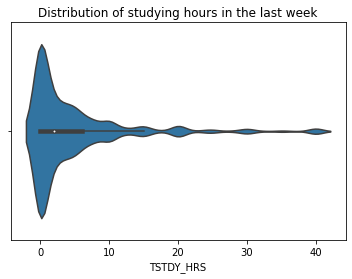

In [254]:
# Distribution of the number of studying hours
sns.violinplot(x = df['TSTDY_HRS'])
plt.title('Distribution of studying hours in the last week');

The plot shows that the graph is right skewed and there area several small peaks that can be seen. The areas of higher probabilities show that majority of the children spend < 10 hours on studying in the past week. However, this feature would be dropped as it is secondary in influencing the mental health of people.

In [255]:
df.drop(columns = ['TSTDY_HRS'],inplace = True)

**`SCHLHRS`**

Since this feature is mainly targetting at children, it would be dropped.

In [256]:
df.drop(columns = ['SCHLHRS'],inplace = True)

#### `HLTHINS`
Queries regarding health insurance coverage plans

In [257]:
hlthins_dict = {k:v for k,v in sorted_percent_null.items() if k.startswith('HLTHINS')}
hlthins_dict

{'HLTHINS8': 30.384865796737305,
 'HLTHINS7': 27.98782221162575,
 'HLTHINS6': 27.275311551475916,
 'HLTHINS5': 26.90759369469331,
 'HLTHINS4': 26.256522177696674,
 'HLTHINS2': 24.439940945062403,
 'HLTHINS3': 23.170809987987273,
 'HLTHINS1': 18.243757507954996}

In [258]:
# Replacing all No responses as 0
hlthins_df = df[[k for k in hlthins_dict.keys()]]
for i in hlthins_df:
    hlthins_df[i] = hlthins_df[i].replace(2.0,0.0)

In [259]:
hlthins_df.sum()

HLTHINS8     4418.0
HLTHINS7      761.0
HLTHINS6     4409.0
HLTHINS5     4367.0
HLTHINS4     9517.0
HLTHINS2    21757.0
HLTHINS3    22363.0
HLTHINS1    61688.0
dtype: float64

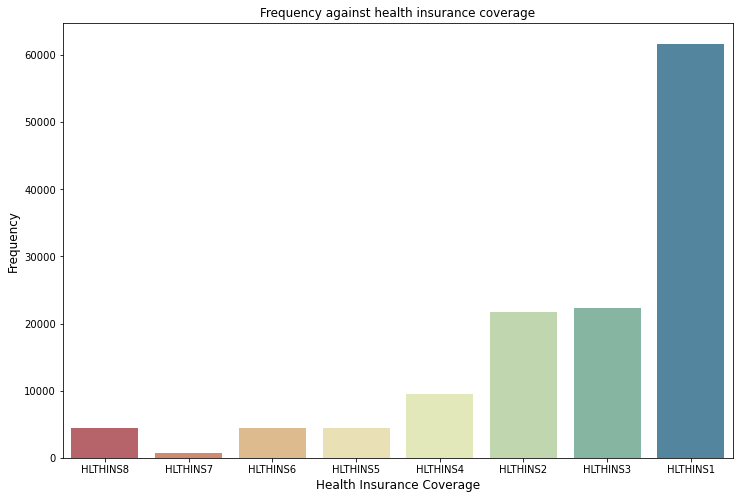

In [328]:
# Plot frequency against health insurance coverage
plt.figure(figsize = (12,8))
sns.barplot(x = [i for i in hlthins_df.sum().index],y = [i for i in hlthins_df.sum().values])
plt.title('Frequency against health insurance coverage')
plt.ylabel('Frequency',fontsize = 12)
plt.xlabel('Health Insurance Coverage',fontsize = 12);

|Features|Labels|
|--------|------|
|HLTHINS1|Insured by a current/former employer/union|
|HLTHINS2|Insured by an insurance company|
|HLTHINS3|Medicare, people > 65 and people with disabilities|
|HLTHINS4|Government-assistance plan(Medicaid,Medical Assistance)|
|HLTHINS5|TRICARE/other military healthcare|
|HLTHINS6|VA healthcare|
|HLTHINS7|Indian Health Service|
|HLTHINS8|Others|

In [260]:
hlthins_df.isnull().sum()

HLTHINS8    31969
HLTHINS7    29374
HLTHINS6    28609
HLTHINS5    28211
HLTHINS4    27502
HLTHINS2    25533
HLTHINS3    24181
HLTHINS1    18812
dtype: int64

Out of those who are insured, majority of them are insured by their current employer. Given that there is a strong correlation of health insurance with employment, the loss of income/career would have a ripple effect on the health insurance coverage of people. Medicare is the next most popular health insurance coverage as it has been the largest payer in the US. Since medical expenses are huge finanical woes for people despite being insured, these features could be important in influencing the mental well-being of people.

https://www.bmj.com/content/370/bmj.m2606

**`PUBHLTH`** and **`PRIVHLTH`**

In [261]:
df['PUBHLTH'].value_counts(dropna = False)

2    52056
1    31091
3    24480
Name: PUBHLTH, dtype: int64

In [262]:
df['PRIVHLTH'].value_counts(dropna = False)

1    72529
3    19291
2    15807
Name: PRIVHLTH, dtype: int64

Since there is a large number of missing values in `HLTHINS` features and `PUBHLTH` and `PRIVHLTH` are sufficient to account for the health insurance coverage status of people, these would be dropped. A new feature `INSURED` would be engineered from `PUBHLTH` and `PRIVHLTH` to distinguish insured from un-insured respondents and a a missing class for the nonresponses

In [263]:
# Engineering a new feature INSURED where 1 = ins
df['INSURED'] = df.apply(lambda row: 'Insured' if (row['PUBHLTH'] == 1) | (row['PRIVHLTH'] == 1) else 
                         ('Missing' if (row['PUBHLTH'] == 3) & (row['PRIVHLTH'] == 3) else 'Not insured')  ,axis = 1)
df['INSURED'].value_counts(dropna = False,normalize = True) * 100

Insured        78.973678
Missing        15.680080
Not insured     5.346242
Name: INSURED, dtype: float64

In [264]:
# Dropping redundant HLTHINS features
df.drop(columns = [i for i in hlthins_dict.keys()],inplace = True)

#### `UNEMPPAY`
Question asking if respondents are paid for time not working

In [265]:
df['UNEMPPAY'].value_counts(dropna = False)

NaN    68729
4.0    35883
2.0     1337
3.0     1133
1.0      545
Name: UNEMPPAY, dtype: int64

In [266]:
unemppay_df = pd.DataFrame({
    'Responses(values)':[i for i in df['UNEMPPAY'].value_counts(dropna = False).sort_index().index],
    'Responses(actual)':['Fully pay with paid leave','Full-pay without taking paid leave','Partial pay','No pay','Missing'],
    'Number':[i for i in df['UNEMPPAY'].value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df['UNEMPPAY'].value_counts(dropna = False,normalize = True).sort_index().values]
})
unemppay_df

Responses(values)                   Responses(actual)  Number  Percentage
0                1.0           Fully pay with paid leave     545        0.51
1                2.0  Full-pay without taking paid leave    1337        1.24
2                3.0                         Partial pay    1133        1.05
3                4.0                              No pay   35883       33.34
4                NaN                             Missing   68729       63.86

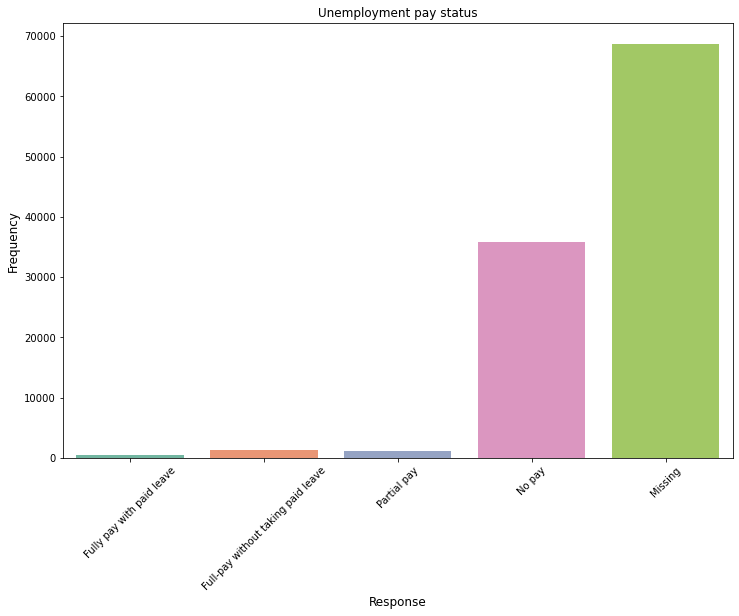

In [267]:
# Plot frequency against unemployment pay status
plt.figure(figsize = (12,8))
sns.barplot(x = unemppay_df['Responses(actual)'],y = unemppay_df['Number'],palette = 'Set2')
plt.title('Unemployment pay status')
plt.ylabel('Frequency',fontsize = 12)
plt.xlabel('Response',fontsize = 12)
plt.xticks(rotation = 45);

Since there is a large number of missing data and most of them are unpaid, this feature can be dropped and the change in employment status as a result of COVID can be accounted for by `ANYWORK`

In [268]:
# Dropping UNEMPPAY feature
df.drop(columns = ['UNEMPPAY'],inplace = True)

#### `ANYWORK`
Question which asks for the employment status of people in the last 7 days.

In [269]:
df['ANYWORK'].value_counts(dropna = False)

1.0    66551
2.0    40929
NaN      147
Name: ANYWORK, dtype: int64

In [270]:
anywork_df = pd.DataFrame({
    'Responses(values)':[i for i in df['ANYWORK'].value_counts(dropna = False).sort_index().index],
    'Responses(actual)':['Working','Not working','Missing'],
    'Number':[i for i in df['ANYWORK'].value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df['ANYWORK'].value_counts(dropna = False,normalize = True).sort_index().values]
})
anywork_df

Responses(values) Responses(actual)  Number  Percentage
0                1.0           Working   66551       61.83
1                2.0       Not working   40929       38.03
2                NaN           Missing     147        0.14

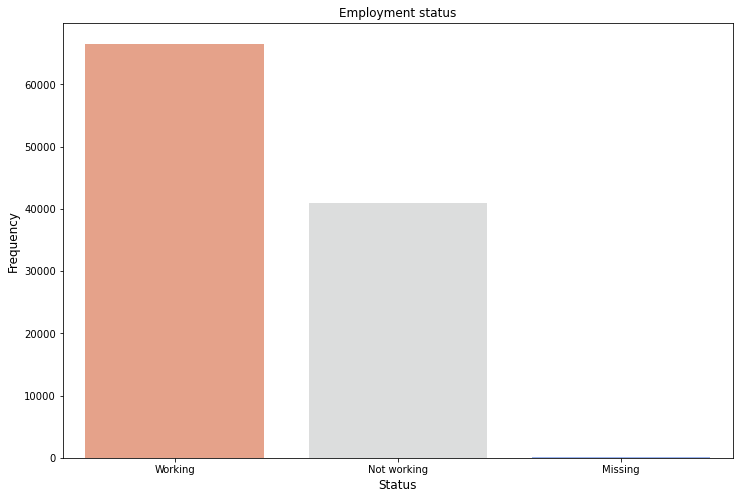

In [271]:
# plot Frequency against employment status
plt.figure(figsize = (12,8))
sns.barplot(x = anywork_df['Responses(actual)'], y = anywork_df['Number'], palette = 'coolwarm_r')
plt.title('Employment status')
plt.xlabel('Status', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12 );

Close to 40% of the respondents are no longer employed. Missing values in `ANYWORK` would also be dropped since they only account for a small percentage of responses.

In [272]:
# Dropping null values in ANYWORK
df.dropna(subset = ['ANYWORK'],inplace = True)

#### `RSNNOWRK`

In [273]:
df['RSNNOWRK'].value_counts(dropna = False,normalize = True) * 100

NaN     62.346483
7.0     17.248790
12.0     5.494045
9.0      2.542799
4.0      2.422776
8.0      2.337179
6.0      1.756606
10.0     1.540752
1.0      1.480275
13.0     1.323967
5.0      0.487533
2.0      0.458690
11.0     0.453108
3.0      0.106997
Name: RSNNOWRK, dtype: float64

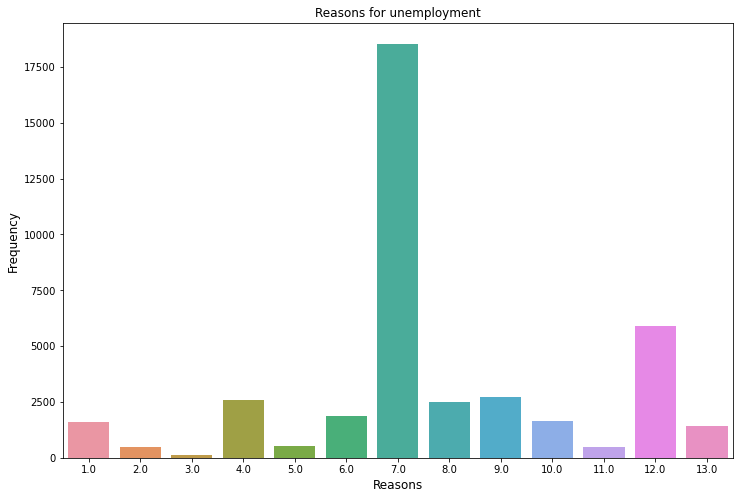

In [274]:
# Plot frequency against reasons for unemployment
plt.figure(figsize = (12,8))
sns.barplot(x = df['RSNNOWRK'].value_counts().sort_index().index, y = df['RSNNOWRK'].value_counts().sort_index().values)
plt.title('Reasons for unemployment')
plt.xlabel('Reasons',fontsize = 12)
plt.ylabel('Frequency',fontsize = 12);

|Options|Labels|
|--------|------|
|1|I did not want to be employed at this time|
|2|I am/was sick with coronavirus symptoms|
|3|I am/was caring for someone with coronavirus symptoms|
|4|I am/was caring for children not in school/daycare|
|5|I am/was caring for an elderly person|
|6|I am/was sick(not coronavirus related) or disabled|
|7|I am retired|
|8|My employer experienced a reduction in business|
|9|I am/was laid off due to coronavirus pandemic|
|10|My employer closed temporarily due to coronavirus pandemic|
|11|My employer went out of business due to coronavirus pandemic|
|12|Others|
|13|I was concerned about getting/spreading the coronavirus|

Majority of the respondents have who stopped working have retired and therefore are not working. However, given the large number of missing data as this is associated with `ANYWORK`, this can be dropped. 

In [275]:
# Dropping RSNNOWRK feature
df.drop(columns = ['RSNNOWRK'],inplace = True)

#### `KINDWORK`

In [276]:
df['KINDWORK'].value_counts().sum()

65480

In [277]:
kindwork_df = pd.DataFrame({
    'Responses(values)':[i for i in df['KINDWORK'].value_counts(dropna = False).sort_index().values],
    'Responses(actual)':['Government','Private Company','NPO','Self-employed','Family Business','Missing'],
    'Number':[i for i in df['KINDWORK'].value_counts(dropna= False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df['KINDWORK'].value_counts(dropna = False,normalize = True).sort_index().values]
})
kindwork_df

Responses(values) Responses(actual)  Number  Percentage
0              11698        Government   11698       10.88
1              36268   Private Company   36268       33.74
2               8102               NPO    8102        7.54
3               7896     Self-employed    7896        7.35
4               1516   Family Business    1516        1.41
5              42000           Missing   42000       39.08

Since there is a large number of missing values which overlap in the **Not working** class in `ANYWORK`, this feature would be dropped to reduce correlation between columns when modeling our data

In [278]:
# Dropping KINDWORK feature
df.drop(columns = ['KINDWORK'],inplace = True)

#### `TUI_NUMPER`

In [279]:
df['TUI_NUMPER'].value_counts(dropna = False)

0.0    61154
NaN    26987
1.0    15198
2.0     4141
Name: TUI_NUMPER, dtype: int64

Since this overlaps with `UI_APPLY` as they both measure the number of UI applications, this would be dropped.

In [280]:
df.drop(columns = ['TUI_NUMPER'],inplace = True)

#### `INCOME`

In [281]:
income_df = pd.DataFrame({
    'Responses(values)':[i for i in df['INCOME'].value_counts(dropna = False).sort_index().index],
    'Responses(actual)':['< $25,000','$25,000 - $34,999','$35,000 - $49,999','$50,000 - $74,999','$75,000 - $99,999','$100,000 - $149,999','$150,000 - $199,999','> $200,000','Missing'],
    'Number':[i for i in df['INCOME'].value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df['INCOME'].value_counts(dropna = False).sort_index().values]
                
})
income_df

Responses(values)    Responses(actual)  Number  Percentage
0                1.0            < $25,000    8326      832600
1                2.0    $25,000 - $34,999    7011      701100
2                3.0    $35,000 - $49,999    9093      909300
3                4.0    $50,000 - $74,999   14790     1479000
4                5.0    $75,000 - $99,999   12575     1257500
5                6.0  $100,000 - $149,999   15652     1565200
6                7.0  $150,000 - $199,999    7496      749600
7                8.0           > $200,000    9135      913500
8                NaN              Missing   23402     2340200

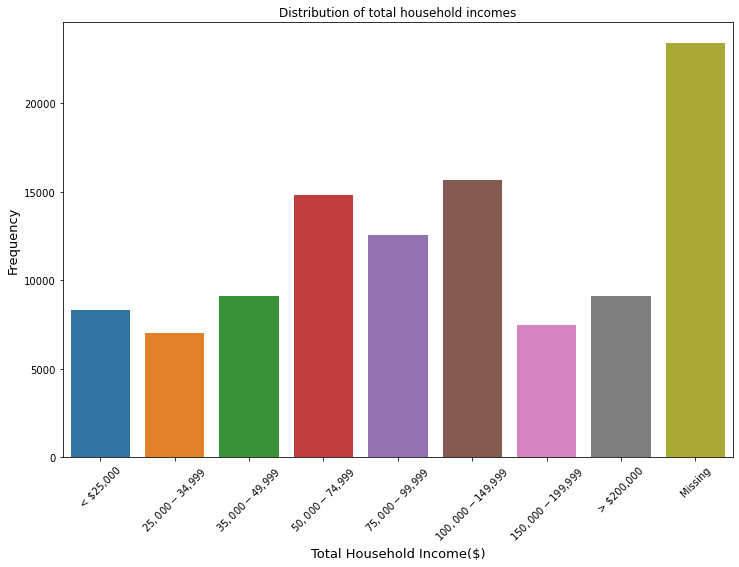

In [283]:
# plot frequency against total household incomes 
plt.figure(figsize = (12,8))
sns.barplot(x = income_df['Responses(actual)'], y = income_df['Number'])
plt.title('Distribution of total household incomes')
plt.ylabel('Frequency',fontsize = 13)
plt.xlabel('Total Household Income($)',fontsize = 13)
plt.xticks(rotation = 45);

Since the median household income was $68,703 in 2019, the missing values would be grouped under the 50,000 - 74,999 category instead.

In [284]:
# Replacing missing values with 4.0
df['INCOME'].fillna(4.0,inplace = True)

#### `TBEDROOMS`

In [285]:
df['TBEDROOMS'].value_counts(dropna = False,normalize = True) * 100

3.0    32.223670
NaN    19.205434
4.0    19.157983
2.0    16.394678
1.0     6.199293
5.0     5.120953
6.0     1.195571
0.0     0.502419
Name: TBEDROOMS, dtype: float64

Since the number of bedrooms are secondary and unlikely in influencing the health of people, this feature can be dropped.

#### `LIVQTR`

In [286]:
df['LIVQTR'].value_counts(dropna = False,normalize = True) * 100

2.0     57.619092
NaN     17.446967
3.0      6.687756
9.0      3.832341
5.0      2.771678
6.0      2.572572
1.0      2.510234
7.0      2.285076
8.0      2.084109
4.0      1.841273
10.0     0.348902
Name: LIVQTR, dtype: float64

Since this feature is not immediately helpful to predicting the mental health states of people and other features are able to provide more information on the housing status of people, this can be dropped.

In [287]:
df.drop(columns = ['LIVQTR','TBEDROOMS'],inplace = True)

#### `TSPNDPRPD`

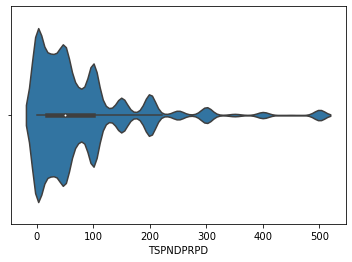

In [288]:
# Distribution of food expenditure over the last week
sns.violinplot(df['TSPNDPRPD'])

In [289]:
df['TSPNDPRPD'].mean()

77.85821919348672

#### `TSPNDFOOD`

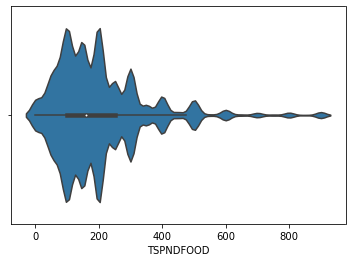

In [290]:
sns.violinplot(df['TSPNDFOOD'])

In [291]:
print(f'Median weekly household food expenditure: {df.TSPNDFOOD.median()}')
print(f'Mean weekly household food expenditure: {df.TSPNDFOOD.mean()}')

Median weekly household food expenditure: 160.0
Mean weekly household food expenditure: 199.09328224833564


Both graphs are multimodal graphs where there are clusters of people with different weekly household food expenditure. This could be indicative of different communities or states that are more/less affluent. Since `TSPNDPRPD` is a subset of `TSPNDFOOD` and has more missing values, this feature would be dropped. The missing values in `TSPNDFOOD` would be imputed with the median values since the data is positively skewed.

In [292]:
# Dropping TSPNDPRPF feature
df.drop(columns = ['TSPNDPRPD'],inplace = True)

In [293]:
# Imputing missing values with median food expenditure
df['TSPNDFOOD'].fillna(df.TSPNDFOOD.median(),inplace = True)

#### `MH_SVCS`

In [294]:
df['MH_SVCS'].value_counts(dropna = False,normalize = True) * 100

2.0    75.352624
NaN    16.155564
1.0     8.491812
Name: MH_SVCS, dtype: float64

The large percentage of null values would be replaced as a new class under the **Missing** class to prevent loss of information. The other 2 classes would be renamed for ease of reference.

In [295]:
# Imputing null values as Missing
df['MH_SVCS'] = df['MH_SVCS'].fillna('Missing')
# Renaming the other 2 classes
df['MH_SVCS'] = df['MH_SVCS'].replace(1,'Yes')
df['MH_SVCS'] = df['MH_SVCS'].replace(2,'No')

**`PRESCRIPT`**

In [296]:
df['PRESCRIPT'].value_counts(dropna = False)

2.0    70829
1.0    19293
NaN    17358
Name: PRESCRIPT, dtype: int64

Since there is alot of rows with missing values, they would be imputed as a new **Missing** class. The other 2 classes would be renamed for an easier reference.

In [297]:
# Imputing null values as Missing
df['PRESCRIPT'] = df['PRESCRIPT'].fillna('Missing')
# Renaming the other 2 classes
df['PRESCRIPT'] = df['PRESCRIPT'].replace(1,'Yes')
df['PRESCRIPT'] = df['PRESCRIPT'].replace(2,'No')

**`NOTGET`** and **`DELAY`**

In [298]:
df['NOTGET'].value_counts(dropna = False)

2.0    67037
1.0    23152
NaN    17291
Name: NOTGET, dtype: int64

In [299]:
df['DELAY'].value_counts(dropna = False)

2.0    56980
1.0    33223
NaN    17277
Name: DELAY, dtype: int64

Both features are indicators of the hindrance to getting medical aid because of the pandemic and since there are already dire consequences with getting delayed healthcare, `DELAY` is a sufficient measurement and so `NOTGET` would be dropped. Given that there is a large number of missing values, they would be imputed under a **Missing** class instead. 

In [300]:
# Dropping NOTGET feature
df.drop(columns = ['NOTGET'],inplace = True)
# Imputing null values as missing in DELAY and renaming the other classes
df['DELAY'] = df['DELAY'].fillna('Missing')
df['DELAY'] = df['DELAY'].replace(1,'Yes')
df['DELAY'] = df['DELAY'].replace(2,'No')

#### `INTEREST` and `DOWN`

In [301]:
df['INTEREST'].value_counts(dropna = False)

1.0    46105
2.0    28305
NaN    15640
3.0     9794
4.0     7636
Name: INTEREST, dtype: int64

In [302]:
df['DOWN'].value_counts(dropna = False)

1.0    47078
2.0    28712
NaN    15573
3.0     8137
4.0     7980
Name: DOWN, dtype: int64

Since `INTEREST` and `DOWN` seem to have the same number of respondents for each class, `DOWN` would be kept since it has fewer missing values. Moreover, both of the measurements are signs of depression and therefore should be in parallel of one another. The other classes in `DOWN` would be renamed for easier reference(one-hot encoding) during data modeling.

In [303]:
# Dropping INTEREST feature
df.drop(columns = ['INTEREST'],inplace = True)

In [304]:
down_df = pd.DataFrame({
    'Responses(values)':[i for i in df['DOWN'].value_counts(dropna = False).sort_index().index],
    'Responses(actual)':['Not at all','Several days','More than half the days','Nearly everyday','Missing'],
    'Number':[i for i in df['DOWN'].value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df['DOWN'].value_counts(dropna = False,normalize = True).sort_index().values]
})
down_df


Responses(values)        Responses(actual)  Number  Percentage
0                1.0               Not at all   47078       43.80
1                2.0             Several days   28712       26.71
2                3.0  More than half the days    8137        7.57
3                4.0          Nearly everyday    7980        7.42
4                NaN                  Missing   15573       14.49

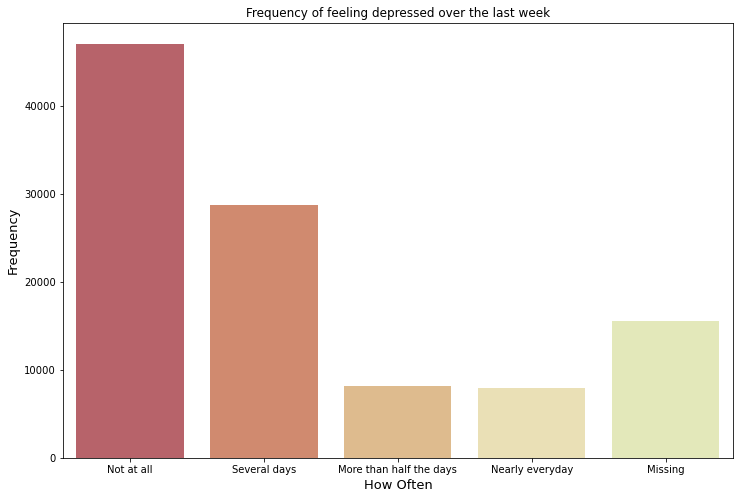

In [374]:
# Plot frequency against feelign depressed
plt.figure(figsize = (12,8))
sns.barplot(x = down_df['Responses(actual)'],y = down_df['Number'])
plt.title('Frequency of feeling depressed over the last week')
plt.xlabel('How Often',fontsize = 13)
plt.ylabel('Frequency',fontsize = 13);

In [305]:
# Rename all the DOWN classes and imputing null as missing
df['DOWN'] = df['DOWN'].replace(1,'Not at all')
df['DOWN'] = df['DOWN'].replace(2,'Several days')
df['DOWN'] = df['DOWN'].replace(3,'More than half the days')
df['DOWN'] = df['DOWN'].replace(4,'Everyday')
df['DOWN'] = df['DOWN'].fillna('Missing')

#### `WORRY` and `ANXIOUS`

In [306]:
df['WORRY'].value_counts(dropna = False,normalize = True) * 100

1.0    40.695013
2.0    26.070897
NaN    14.476182
4.0     9.609230
3.0     9.148679
Name: WORRY, dtype: float64

In [307]:
df['ANXIOUS'].value_counts(dropna = False,normalize = True) * 100

1.0    31.476554
2.0    28.641608
NaN    14.387793
4.0    14.312430
3.0    11.181615
Name: ANXIOUS, dtype: float64

Since worry and anxious have many overlaps, one has to dropped to reduce correlation in dataset. Since `ANXIOUS` has fewer null values and have classes that are more evenly distributed, it would be kept. The missing values would be imputed as a **Missing** class and other classes would be renamed.

In [308]:
# Dropping WORRY feature
df.drop(columns = ['WORRY'],inplace = True)
# Rename all the ANXIOUS classes and imputing null as missing
df['ANXIOUS'] = df['ANXIOUS'].replace(1,'Not at all')
df['ANXIOUS'] = df['ANXIOUS'].replace(2,'Several days')
df['ANXIOUS'] = df['ANXIOUS'].replace(3,'More than half the days')
df['ANXIOUS'] = df['ANXIOUS'].replace(4,'Everyday')
df['ANXIOUS'] = df['ANXIOUS'].fillna('Missing')

#### `HLTHSTATUS`

In [309]:
df['HLTHSTATUS'].value_counts(dropna = False,normalize = True)*100

2.0    31.083923
3.0    23.648121
1.0    18.203387
NaN    14.265910
4.0    10.443803
5.0     2.354857
Name: HLTHSTATUS, dtype: float64

The missing values would be imputed in the **Missing** class given the large number of null values and the other classes would be renamed

In [310]:
# Rename all the HLTHSTATUS classes and imputing null as missing
df['HLTHSTATUS'] = df['HLTHSTATUS'].replace(1,'Excellent')
df['HLTHSTATUS'] = df['HLTHSTATUS'].replace(2,'Very Good')
df['HLTHSTATUS'] = df['HLTHSTATUS'].replace(3,'Good')
df['HLTHSTATUS'] = df['HLTHSTATUS'].replace(4,'Fair')
df['HLTHSTATUS'] = df['HLTHSTATUS'].replace(5,'Poor')
df['HLTHSTATUS'] = df['HLTHSTATUS'].fillna('Missing')

In [311]:
null_columns = df.columns[df.isnull().any()]
null_columns
percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = dict(sorted(percent_null.items(),key = lambda x: x[1],reverse = True))
sorted_percent_null

{'MH_NOTGET': 16.108113137327877,
 'FOODCONF': 13.122441384443617,
 'EXPNS_DIF': 1.8719761816151843,
 'MS': 0.4968366207666543,
 'EXPCTLOSS': 0.22701898027540005,
 'WRKLOSS': 0.10141421659843693}

#### `EXPNS_DIF`

In [312]:
df['EXPNS_DIF'].value_counts(dropna = False,normalize = True) * 100

1.0    52.452549
2.0    21.286751
3.0    14.687384
4.0     9.701340
NaN     1.871976
Name: EXPNS_DIF, dtype: float64

Given the low percentage of null values and a large dataset, the null values can be dropped. The classes are renamed for easier reference after one hot-encoding

In [313]:
# Dropping null values
df.dropna(subset = ['EXPNS_DIF'],inplace = True)

# Renaming classes
df['EXPNS_DIF'] = df['EXPNS_DIF'].replace(1,'Not at all difficult')
df['EXPNS_DIF'] = df['EXPNS_DIF'].replace(2,'A little difficult')
df['EXPNS_DIF'] = df['EXPNS_DIF'].replace(3,'Somewhat difficult')
df['EXPNS_DIF'] = df['EXPNS_DIF'].replace(4,'Very difficult')


#### `FOODCONF`

In [314]:
# Level of confidence in ensuring food sufficiency
df['FOODCONF'].value_counts(dropna = False,normalize = True) * 100

4.0    51.493344
3.0    17.407176
2.0    14.648993
NaN    11.547578
1.0     4.902909
Name: FOODCONF, dtype: float64

The missing values would be imputed in the **Missing** class given the large number of null values and the other classes would be renamed

In [315]:
# Rename all the HLTHSTATUS classes and imputing null as missing
df['FOODCONF'] = df['FOODCONF'].replace(1,'Not at all confident')
df['FOODCONF'] = df['FOODCONF'].replace(2,'Somewhat confident')
df['FOODCONF'] = df['FOODCONF'].replace(3,'Moderately Confident')
df['FOODCONF'] = df['FOODCONF'].replace(4,'Very Confident')
df['FOODCONF'] = df['FOODCONF'].fillna('Missing')

#### `EXPCTLOSS` and `WRKLOSS`

In [316]:
df['WRKLOSS'].value_counts(dropna = False,normalize = True) * 100

2.0    61.859521
1.0    38.042819
NaN     0.097660
Name: WRKLOSS, dtype: float64

40% of the respondents replied that someone in their households have lost a job since the declaration of the state of emergency on 13 March

In [317]:
# Removing null values since it makes up a small percentage
df.dropna(subset = ['WRKLOSS'],inplace = True)

# Renaming the classes 
df['WRKLOSS'] = df['WRKLOSS'].replace(2,0)

In [318]:
df['EXPCTLOSS'].value_counts(dropna = False,normalize=  True) * 100

2.0    78.756703
1.0    21.043990
NaN     0.199307
Name: EXPCTLOSS, dtype: float64

About 20% of the respondents anticipate unemployment in the next month

In [319]:
# Removing null values since it makes up a small percentage
df.dropna(subset = ['EXPCTLOSS'],inplace = True)

# Renaming the classes(1 = yes, 2 = no)
df['EXPCTLOSS'] = df['EXPCTLOSS'].replace(2,0)

#### `MS`
Feature indicating the marital status of respondents

In [320]:
df['MS'].value_counts(dropna = False,normalize = True)*100

1.0    57.300176
5.0    20.655223
3.0    14.894204
2.0     4.799582
4.0     1.871523
NaN     0.479292
Name: MS, dtype: float64

Given the small percentage of null values, these would be dropped

In [321]:
df.dropna(subset = ['MS'],inplace = True)

In [322]:
ms_df = pd.DataFrame({
    'Responses(values)':[i for i in df['MS'].value_counts(dropna = False).sort_index().index],
    'Responses(actual)':['Married','Widowed','Divorced','Separated','Never Married'],
    'Number':[i for i in df['MS'].value_counts(dropna = False).sort_index().values],
    'Percentage':[round(i*100,2) for i in df['MS'].value_counts(dropna = False,normalize = True).sort_index().values]
})
ms_df

Responses(values) Responses(actual)  Number  Percentage
0                1.0           Married   60254       57.58
1                2.0           Widowed    5047        4.82
2                3.0          Divorced   15662       14.97
3                4.0         Separated    1968        1.88
4                5.0     Never Married   21720       20.75

In [323]:
# Rename all the MS classes 
df['MS'] = df['MS'].replace(1,'Married')
df['MS'] = df['MS'].replace(2,'Widowed')
df['MS'] = df['MS'].replace(3,'Divorced')
df['MS'] = df['MS'].replace(4,'Separated')
df['MS'] = df['MS'].replace(5,'Never Married')

#### **`EGENDER`**

In [324]:
df['EGENDER'].value_counts(dropna = False)

2    61415
1    43236
Name: EGENDER, dtype: int64

In [325]:
# Renaming the classes, Male = 1, Female = 0
df['EGENDER'] = df['EGENDER'].replace(2,0)

In [326]:
df['EGENDER'].value_counts()

0    61415
1    43236
Name: EGENDER, dtype: int64

#### `EEDUC`

In [327]:
df['EEDUC'].value_counts(dropna = False)
# Renaming all the classes
df['EEDUC'] = df['EEDUC'].replace(1,'Less than high school')
df['EEDUC'] = df['EEDUC'].replace(2,'Some high school')
df['EEDUC'] = df['EEDUC'].replace(3,'High school graduate/equivalent')
df['EEDUC'] = df['EEDUC'].replace(4,'College undergraduate/dropout')
df['EEDUC'] = df['EEDUC'].replace(5,"Associate's degree")
df['EEDUC'] = df['EEDUC'].replace(6,"Bachelor's degree")
df['EEDUC'] = df['EEDUC'].replace(7,'Graduate degree')

In [400]:
df['EEDUC'].value_counts(dropna = False)

Bachelor's degree                  30719
Graduate degree                    25725
College undergraduate/dropout      22562
High school graduate/equivalent    12589
Associate's degree                 10931
Some high school                    1478
Less than high school                647
Name: EEDUC, dtype: int64

#### `RRACE`

In [328]:
df['RRACE'].value_counts(dropna = False)

1    85261
2     8803
3     5419
4     5168
Name: RRACE, dtype: int64

In [329]:
# Renaming classes before one hot encoding
df['RRACE'] = df['RRACE'].replace(1,'White')
df['RRACE'] = df['RRACE'].replace(2,'Black')
df['RRACE'] = df['RRACE'].replace(3,'Asian')
df['RRACE'] = df['RRACE'].replace(4,'Others')

### Target variable
**`MH_NOTGET`**

It is a feature which measures the likelihood of receiving counseling/therapy from a mental health professional where 2 = got help given that they they needed professional aid and 1 = did not get help given that they needed professional aid. As this feature is normalized by the condition that everyone needs helps, it would be simplified into two classes, did get help and did not get help. This would group people that do not need professional aid under the same category as those who received the necessary help to cope with their mental health. Since the motivation is to identify people who have refrained from seeking mental health therapy, this grouping would be inconsequential. The implications of refraining from seeking necessary aid is still critical and thus making predictions of susceptible respondents would allow for an early intervention.

In [330]:
df['MH_NOTGET'].value_counts(dropna = False,normalize = True) * 100

2.0    77.298831
NaN    14.517778
1.0     8.183391
Name: MH_NOTGET, dtype: float64

Since `MH_NOTGET` is our target variable, null values would be removed

In [331]:
# Dropping all null rows
df.dropna(subset = ['MH_NOTGET'],inplace = True)

In [332]:
# Relabelling values to fit a binary classification model
# 1 = Did not get help, 0 = Did get help
df['MH_NOTGET'] = df['MH_NOTGET'].replace(2,0)

In [333]:
df['MH_NOTGET'].value_counts(normalize = True) * 100

0.0    90.426792
1.0     9.573208
Name: MH_NOTGET, dtype: float64

In [334]:
# Displaying percentage of null values in all columns with null values
percent_null = {}
for col in null_columns:
    percent_null[col] = (df[col].isnull().sum()/len(df)) * 100
sorted_percent_null = dict(sorted(percent_null.items(),key = lambda x: x[1],reverse = True))
sorted_percent_null

{'MS': 0.0,
 'WRKLOSS': 0.0,
 'EXPCTLOSS': 0.0,
 'EXPNS_DIF': 0.0,
 'FOODCONF': 0.0,
 'MH_NOTGET': 0.0}

### Saving cleaned data

In [335]:
df.to_csv('../datasets/cleaned_data_week_13.csv',index = False)

### References
--- 
1) Schumaker, E. (2020, September 22). Timeline: How coronavirus got started. AbcNEWS. https://abcnews.go.com/Health/timeline-coronavirus-started/story?id=69435165 <br>
2) Cathey, L. (2020, March 14). Government coronavirus response: Trump declares national emergency, says he “likely” will get tested. AbcNEWS. https://abcnews.go.com/Politics/government-coronavirus-response-live-updates-trump-declares-national/story?id=69580277 <br>
3) Aziz, S. (2020, October 22). New coronavirus surge in the US: What you need to know. ALJAZEERA. https://www.aljazeera.com/news/2020/10/22/us-coronavirus-surge-four-things-to-know <br>
4) Elshaug, A. (2020, August 14). Pandemic letter from America: how the US handling of COVID-19 provides the starkest warning for us all. The Conversation. https://theconversation.com/pandemic-letter-from-america-how-the-us-handling-of-covid-19-provides-the-starkest-warning-for-us-all-144357 <br>
5) Cox, J. (2020, August 6). U.S. weekly jobless claims total 1.186 million, lowest level of the coronavirus pandemic. CNBC. https://www.cnbc.com/2020/08/06/weekly-jobless-claims.html <br>
6) Kochhar, R. (2020, June 11). Unemployment rose higher in three months of COVID-19 than it did in two years of the Great Recession. Pew Research Center. https://www.pewresearch.org/fact-tank/2020/06/11/unemployment-rose-higher-in-three-months-of-covid-19-than-it-did-in-two-years-of-the-great-recession/